# IMPORTACIÓN DEL DATA SET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score,precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from sklearn.manifold import TSNE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalFocalCrossentropy
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap


In [2]:
Direct=os.path.join(os.getcwd(),'trainingset_v1d1_metadata.csv')
df=pd.DataFrame(pd.read_csv(Direct))

# VISUALIZACIÓN DE DATOS


In [3]:

#################
plt.rcParams['figure.dpi'] = 300 
#################
print('*'*50)
print('*'*50)
display(df.info()) #visualización generalizada del data set
print('*'*50)
print('*'*50)
print("CANTIDAD DE FILAS Y COLUMNAS")
df.shape

**************************************************
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_time       7966 non-null   float64
 1   ifo              7966 non-null   object 
 2   peak_time        7966 non-null   int64  
 3   peak_time_ns     7966 non-null   int64  
 4   start_time       7966 non-null   int64  
 5   start_time_ns    7966 non-null   int64  
 6   duration         7966 non-null   float64
 7   search           7966 non-null   object 
 8   process_id       7966 non-null   int64  
 9   event_id         7966 non-null   int64  
 10  peak_frequency   7966 non-null   float64
 11  central_freq     7966 non-null   float64
 12  bandwidth        7966 non-null   float64
 13  channel          7966 non-null   object 
 14  amplitude        7966 non-null   float64
 15  snr 

None

**************************************************
**************************************************
CANTIDAD DE FILAS Y COLUMNAS


(7966, 28)

In [ ]:
df.isnull().sum()   # No hay valores nulos  

event_time         0
ifo                0
peak_time          0
peak_time_ns       0
start_time         0
start_time_ns      0
duration           0
search             0
process_id         0
event_id           0
peak_frequency     0
central_freq       0
bandwidth          0
channel            0
amplitude          0
snr                0
confidence         0
chisq              0
chisq_dof          0
param_one_name     0
param_one_value    0
gravityspy_id      0
label              0
sample_type        0
url1               0
url2               0
url3               0
url4               0
dtype: int64

In [4]:
# Visualización completa de las columnas del data set
pd.set_option('display.max_columns',None)
# no haya limite en mostrar la cantidad de columnas
y=df.head() # muestra de las primero cinco filas del conjunto de datos
y.to_csv('Head del data set.csv',index=False)
display(y)

event_time ifo   peak_time  peak_time_ns  start_time  start_time_ns  \
0  1.134216e+09  L1  1134216192     931639909  1134216192      832031011   
1  1.129360e+09  L1  1129359781     558593034  1129359781       47851085   
2  1.127425e+09  L1  1127425468     976317882  1127425468      960937023   
3  1.132637e+09  L1  1132636755     365233898  1132636754      951172113   
4  1.132036e+09  L1  1132035853     197264909  1132035852      933837890   

   duration   search  process_id  event_id  peak_frequency  central_freq  \
0   0.18750  Omicron           0        21     1337.695312   1120.043213   
1   0.94238  Omicron           0       107      654.747681   1823.073364   
2   0.04688  Omicron           0       218     1337.827515   2024.177490   
3   0.82422  Omicron           0        88     1182.974609   3981.774658   
4   2.00366  Omicron           0        16     1456.511353   3979.026855   

     bandwidth           channel     amplitude       snr  confidence  chisq  \
0   573.363953  GDS-CALIB_STRAIN  1.197650e-22   7.51139           0      0   
1  3426.576416  GDS-CALIB_STRAIN  8.255850e-23   9.63013           0      0   
2  3778.701904  GDS-CALIB_STRAIN  9.762940e-22  15.37104           0      0   
3  7492.717773  GDS-CALIB_STRAIN  1.462120e-22  10.32116           0      0   
4  7942.912109  GDS-CALIB_STRAIN  4.038300e-22  14.38016           0      0   

   chisq_dof param_one_name  param_one_value gravityspy_id    label  \
0          0          phase         -2.72902    zmIdpucyOG  Whistle   
1          0          phase          1.10682    zWFRqqDxwv  Whistle   
2          0          phase         -0.83099    zKCTakFVcf  Whistle   
3          0          phase          0.76242    z14BdoiFZS  Whistle   
4          0          phase         -0.31161    yyjqLCtAmO  Whistle   

  sample_type                                               url1  \
0       train  https://panoptes-uploads.zooniverse.org/produc...   
1        test  https://panoptes-uploads.zooniverse.org/produc...   
2       train  https://panoptes-uploads.zooniverse.org/produc...   
3  validation  https://panoptes-uploads.zooniverse.org/produc...   
4  validation  https://panoptes-uploads.zooniverse.org/produc...   

                                                url2  \
0  https://panoptes-uploads.zooniverse.org/produc...   
1  https://panoptes-uploads.zooniverse.org/produc...   
2  https://panoptes-uploads.zooniverse.org/produc...   
3  https://panoptes-uploads.zooniverse.org/produc...   
4  https://panoptes-uploads.zooniverse.org/produc...   

                                                url3  \
0  https://panoptes-uploads.zooniverse.org/produc...   
1  https://panoptes-uploads.zooniverse.org/produc...   
2  https://panoptes-uploads.zooniverse.org/produc...   
3  https://panoptes-uploads.zooniverse.org/produc...   
4  https://panoptes-uploads.zooniverse.org/produc...   

                                                url4  
0  https://panoptes-uploads.zooniverse.org/produc...  
1  https://panoptes-uploads.zooniverse.org/produc...  
2  https://panoptes-uploads.zooniverse.org/produc...  
3  https://panoptes-uploads.zooniverse.org/produc...  
4  https://panoptes-uploads.zooniverse.org/produc...

* APLICANDO UN RANDOM FOREST PARA LA CALSIFICACIÓN DE GLITCHES 

In [5]:
#NO INCORPORAR 

df.describe() # Según yo, no tiene caso hacer una descripción de los datos ya que cada dato es independiente, no hay una linea de tiepo
# y adicionalmente hay una desproporción gigantezca en la cantidad de datos que hay respecto al gltich blip

event_time     peak_time  peak_time_ns    start_time  start_time_ns  \
count  7.966000e+03  7.966000e+03  7.966000e+03  7.966000e+03   7.966000e+03   
mean   1.134572e+09  1.134572e+09  5.367225e+08  1.134572e+09   4.476697e+08   
std    9.055378e+06  9.055378e+06  2.726730e+08  9.055378e+06   2.897128e+08   
min    1.126403e+09  1.126403e+09  9.760850e+05  1.126403e+09   0.000000e+00   
25%    1.129616e+09  1.129616e+09  3.066399e+08  1.129616e+09   2.141110e+08   
50%    1.132885e+09  1.132885e+09  5.468750e+08  1.132885e+09   4.921870e+08   
75%    1.135158e+09  1.135158e+09  7.812500e+08  1.135158e+09   7.070310e+08   
max    1.168365e+09  1.168365e+09  9.995110e+08  1.168365e+09   9.990230e+08   

          duration  process_id      event_id  peak_frequency  central_freq  \
count  7966.000000      7966.0   7966.000000     7966.000000   7966.000000   
mean      1.723108         0.0    281.042556      298.530541   1671.821754   
std       2.797458         0.0   1424.269163      470.441968   1338.210755   
min       0.005860         0.0      0.000000       10.071770      9.779620   
25%       0.187500         0.0     25.250000       43.551022    348.980461   
50%       0.742680         0.0     56.000000      121.663269   1485.119019   
75%       2.032590         0.0     98.000000      225.349274   2819.996216   
max      61.230099         0.0  27123.000000     2047.106445   4615.132324   

         bandwidth     amplitude           snr  confidence   chisq  chisq_dof  \
count  7966.000000  7.966000e+03   7966.000000      7966.0  7966.0     7966.0   
mean   3145.309986  1.596469e-19    164.938848         0.0     0.0        0.0   
std    2684.061847  1.724813e-18   1456.507929         0.0     0.0        0.0   
min       1.259180  4.251080e-23      7.500610         0.0     0.0        0.0   
25%     527.595764  1.933943e-22      9.812470         0.0     0.0        0.0   
50%    2482.116455  6.027015e-22     14.325735         0.0     0.0        0.0   
75%    5446.072266  7.092848e-21     33.362663         0.0     0.0        0.0   
max    7946.482910  1.429890e-16  81178.726562         0.0     0.0        0.0   

       param_one_value  
count      7966.000000  
mean         -0.011102  
std           1.814234  
min          -3.141490  
25%          -1.575585  
50%           0.000610  
75%           1.546340  
max           3.140880

C:\Users\OSCAR\AppData\Local\Temp\ipykernel_32512\53579172.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='label',palette='husl')


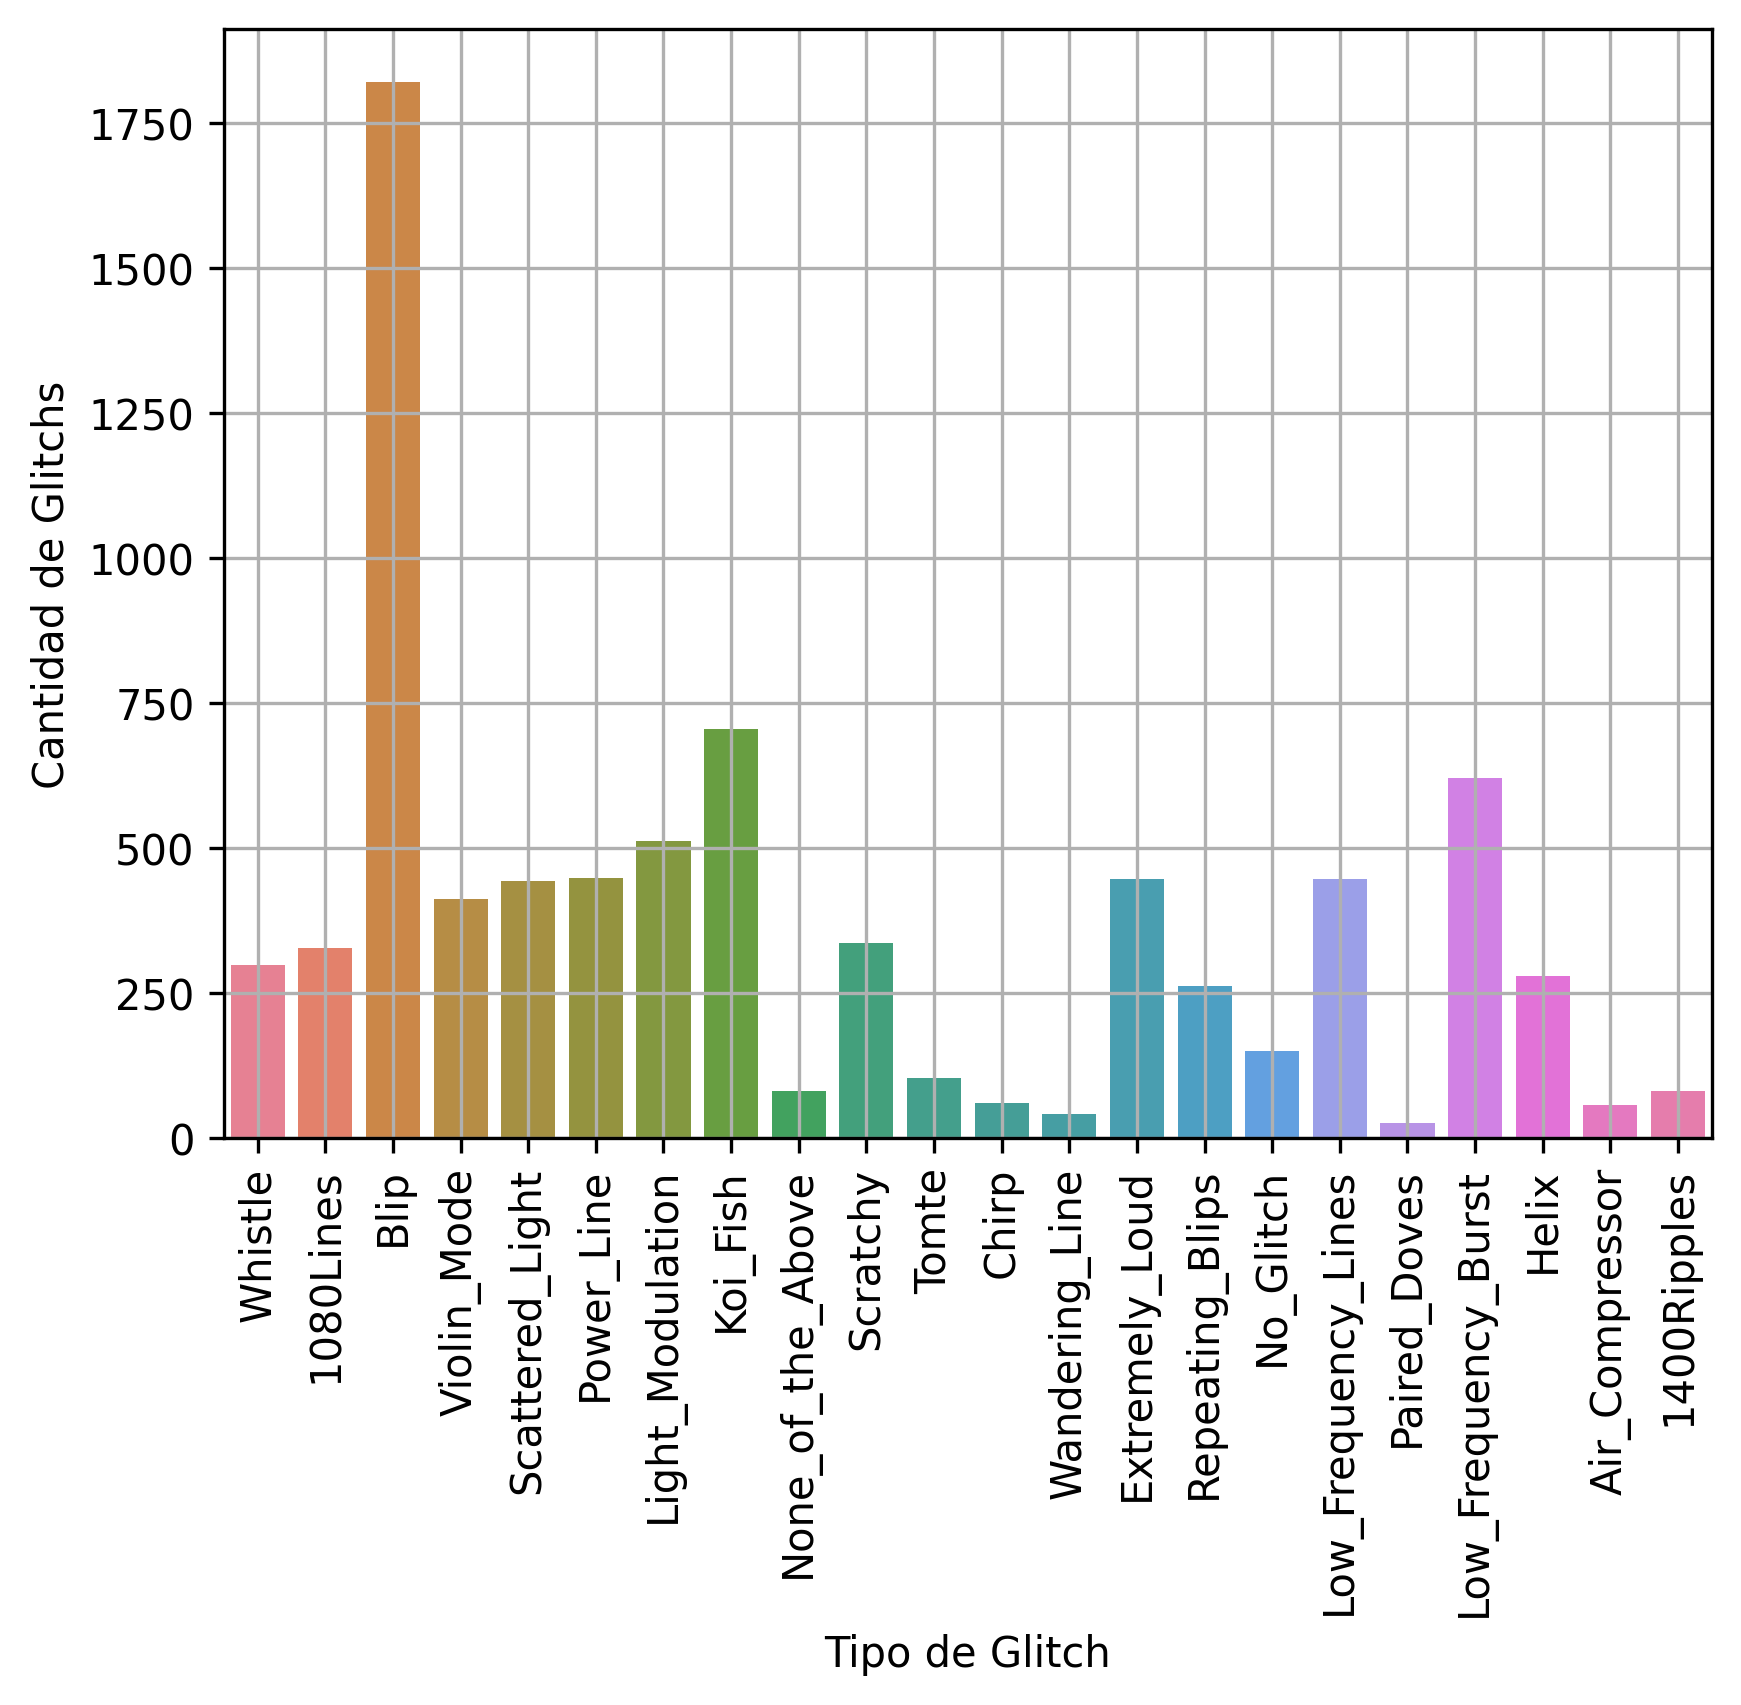

In [5]:
# Vista de Cantidad de glitch's de cada tipo
df1=df.copy() #Variable que contiene una copia del data set original para modoficar ni alterar este mismo
df1['peak_time']=df1['peak_time'].astype(float) 
#Cambio del tipo de dato a flotante 
df1['param_one_value'].dtype 
#verificando que los parametros de entrada para entrenamiento sean de tipo flotante
encoder=LabelEncoder() 
#Aplicación del LabelEncoder para asignar a variables categoricas, valores numericos 
df1['label']=encoder.fit_transform(df1['label'])
plt.figure(2)
sns.countplot(data=df,x='label',palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Glitch')
plt.ylabel('Cantidad de Glitchs')
plt.grid('on')
plt.show()


In [ ]:
# NO COLOCAR 
conteo=df['label'].value_counts()
Ctotal=conteo.get( '1400Ripples',0)
print(Ctotal)

81


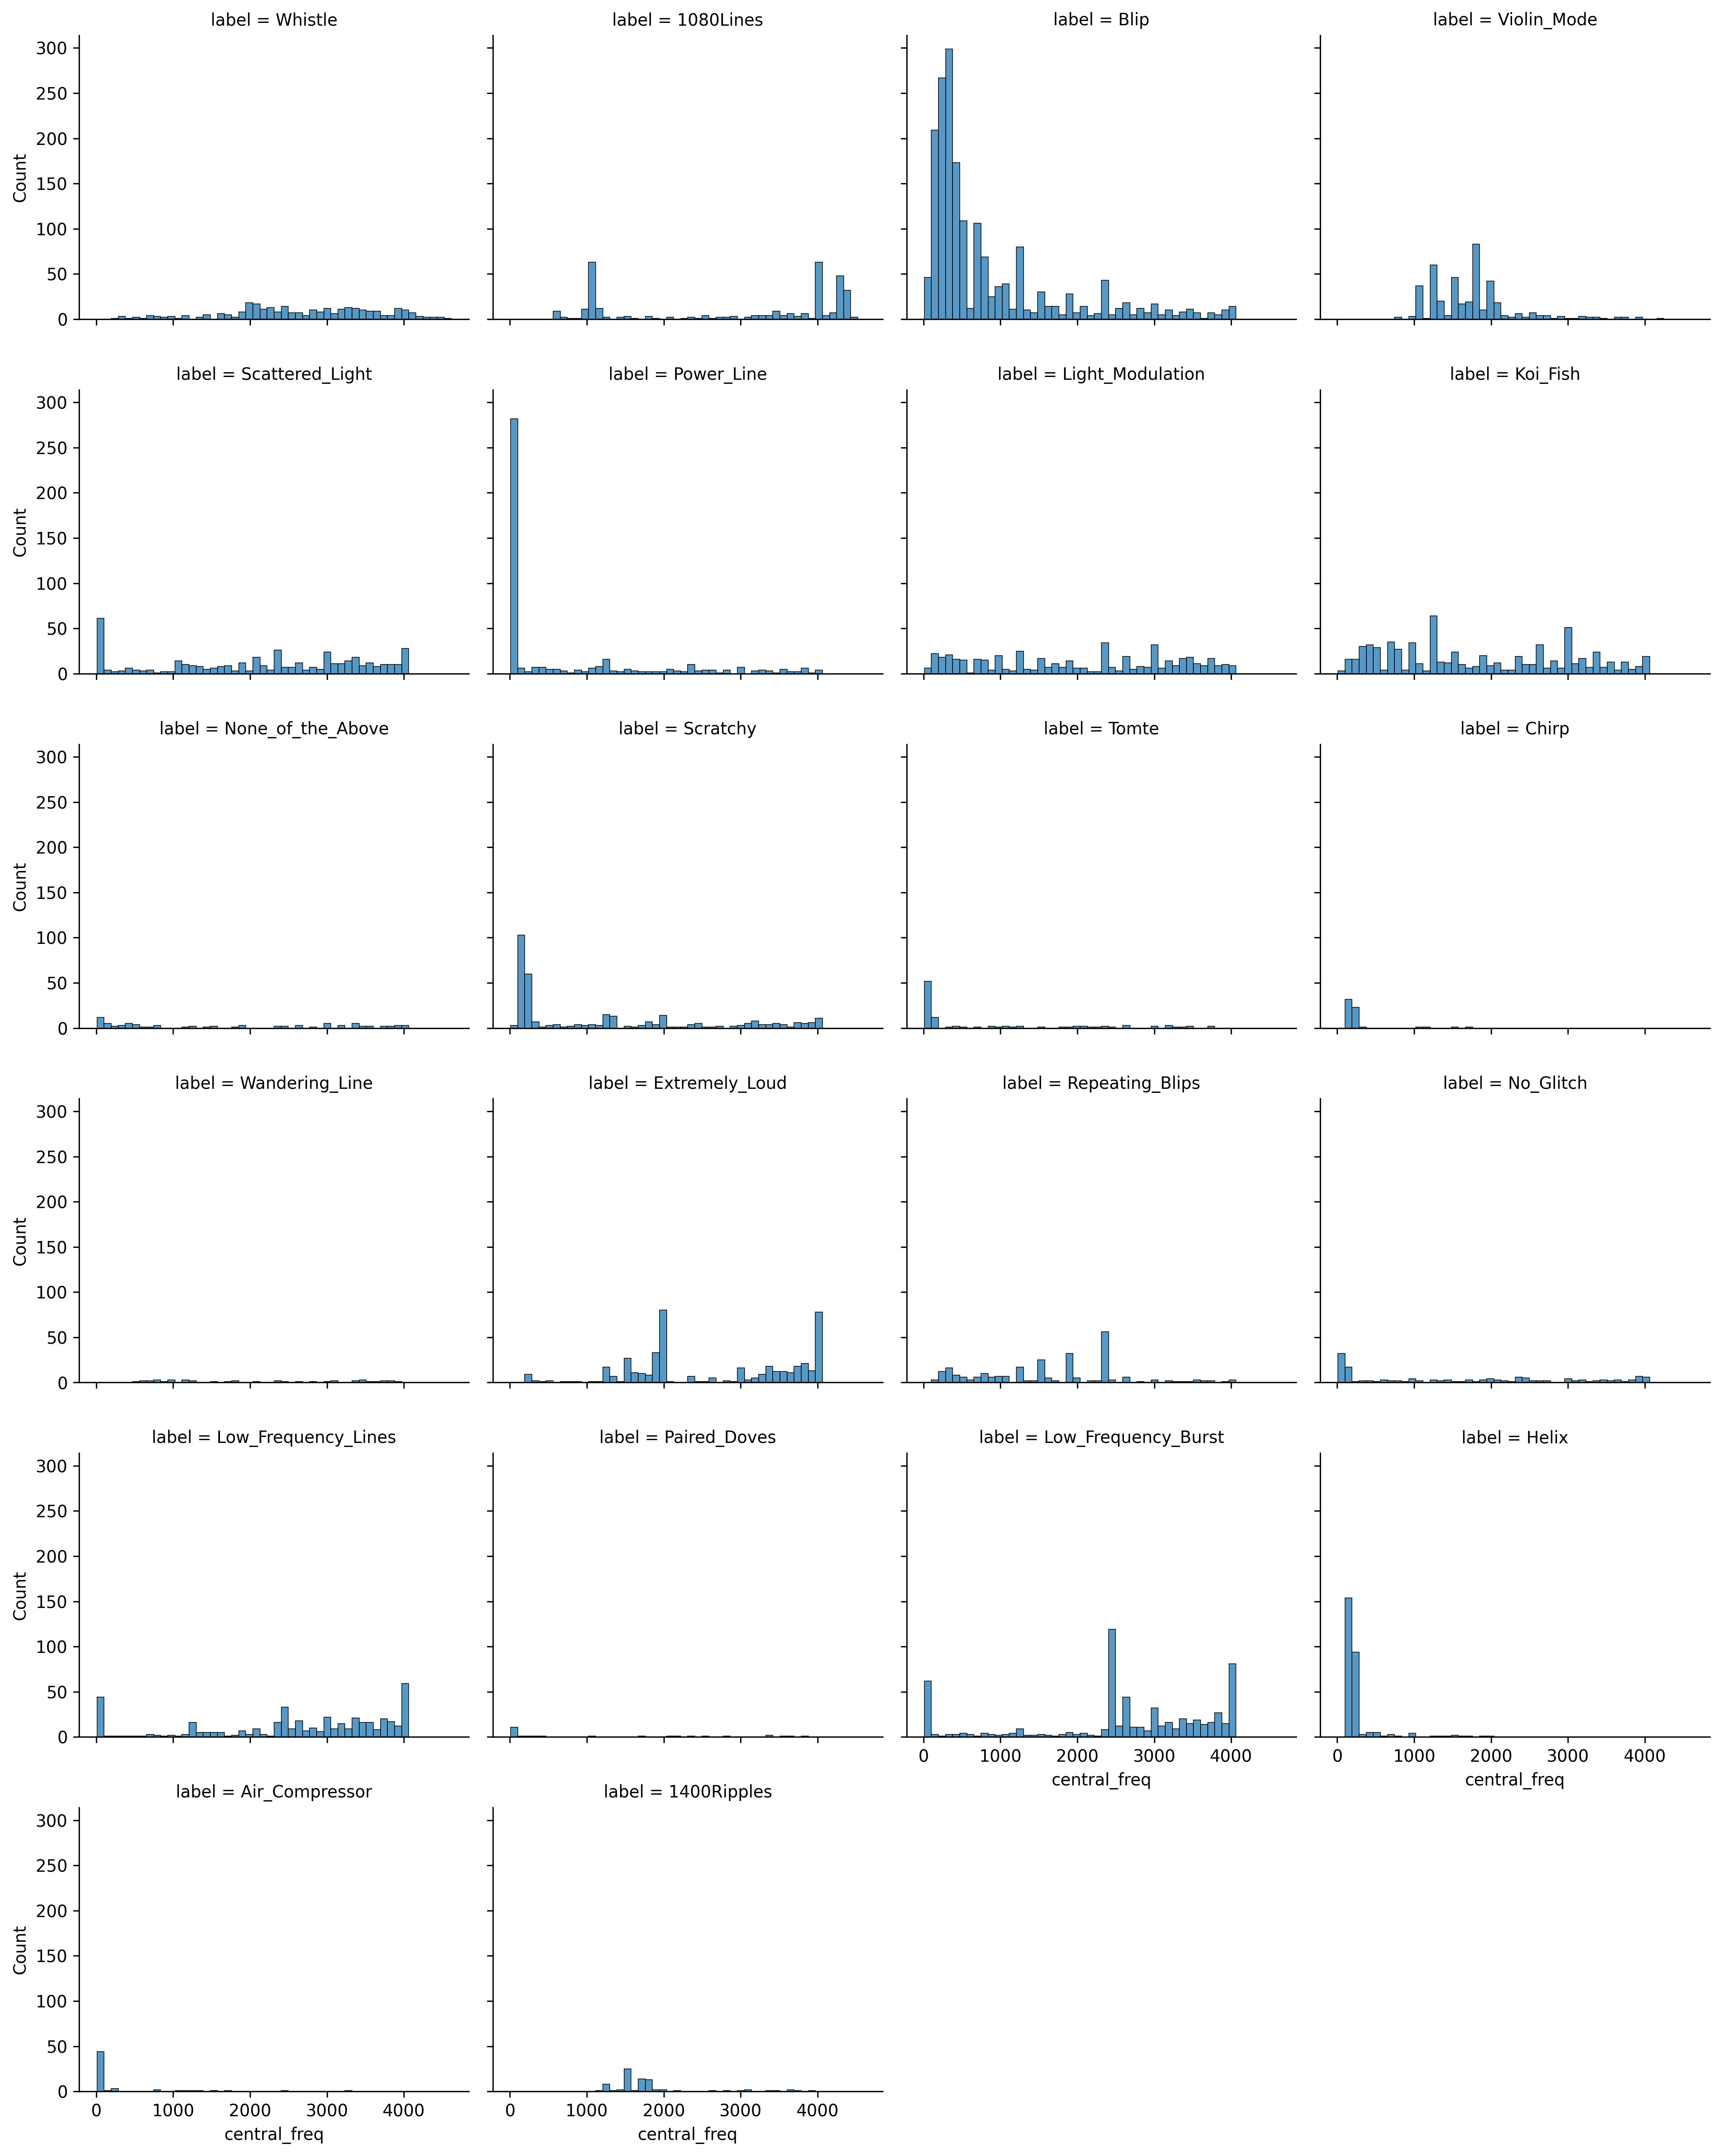

In [20]:
# NO COLOCAR 
sns.displot(
    data=df,
    x='central_freq',
    col='label',
    col_wrap=4,
    bins=50,
    height=3,
    aspect=1.2,
    facet_kws={'sharex':True, 'sharey':True}
)
plt.tight_layout()
plt.show()

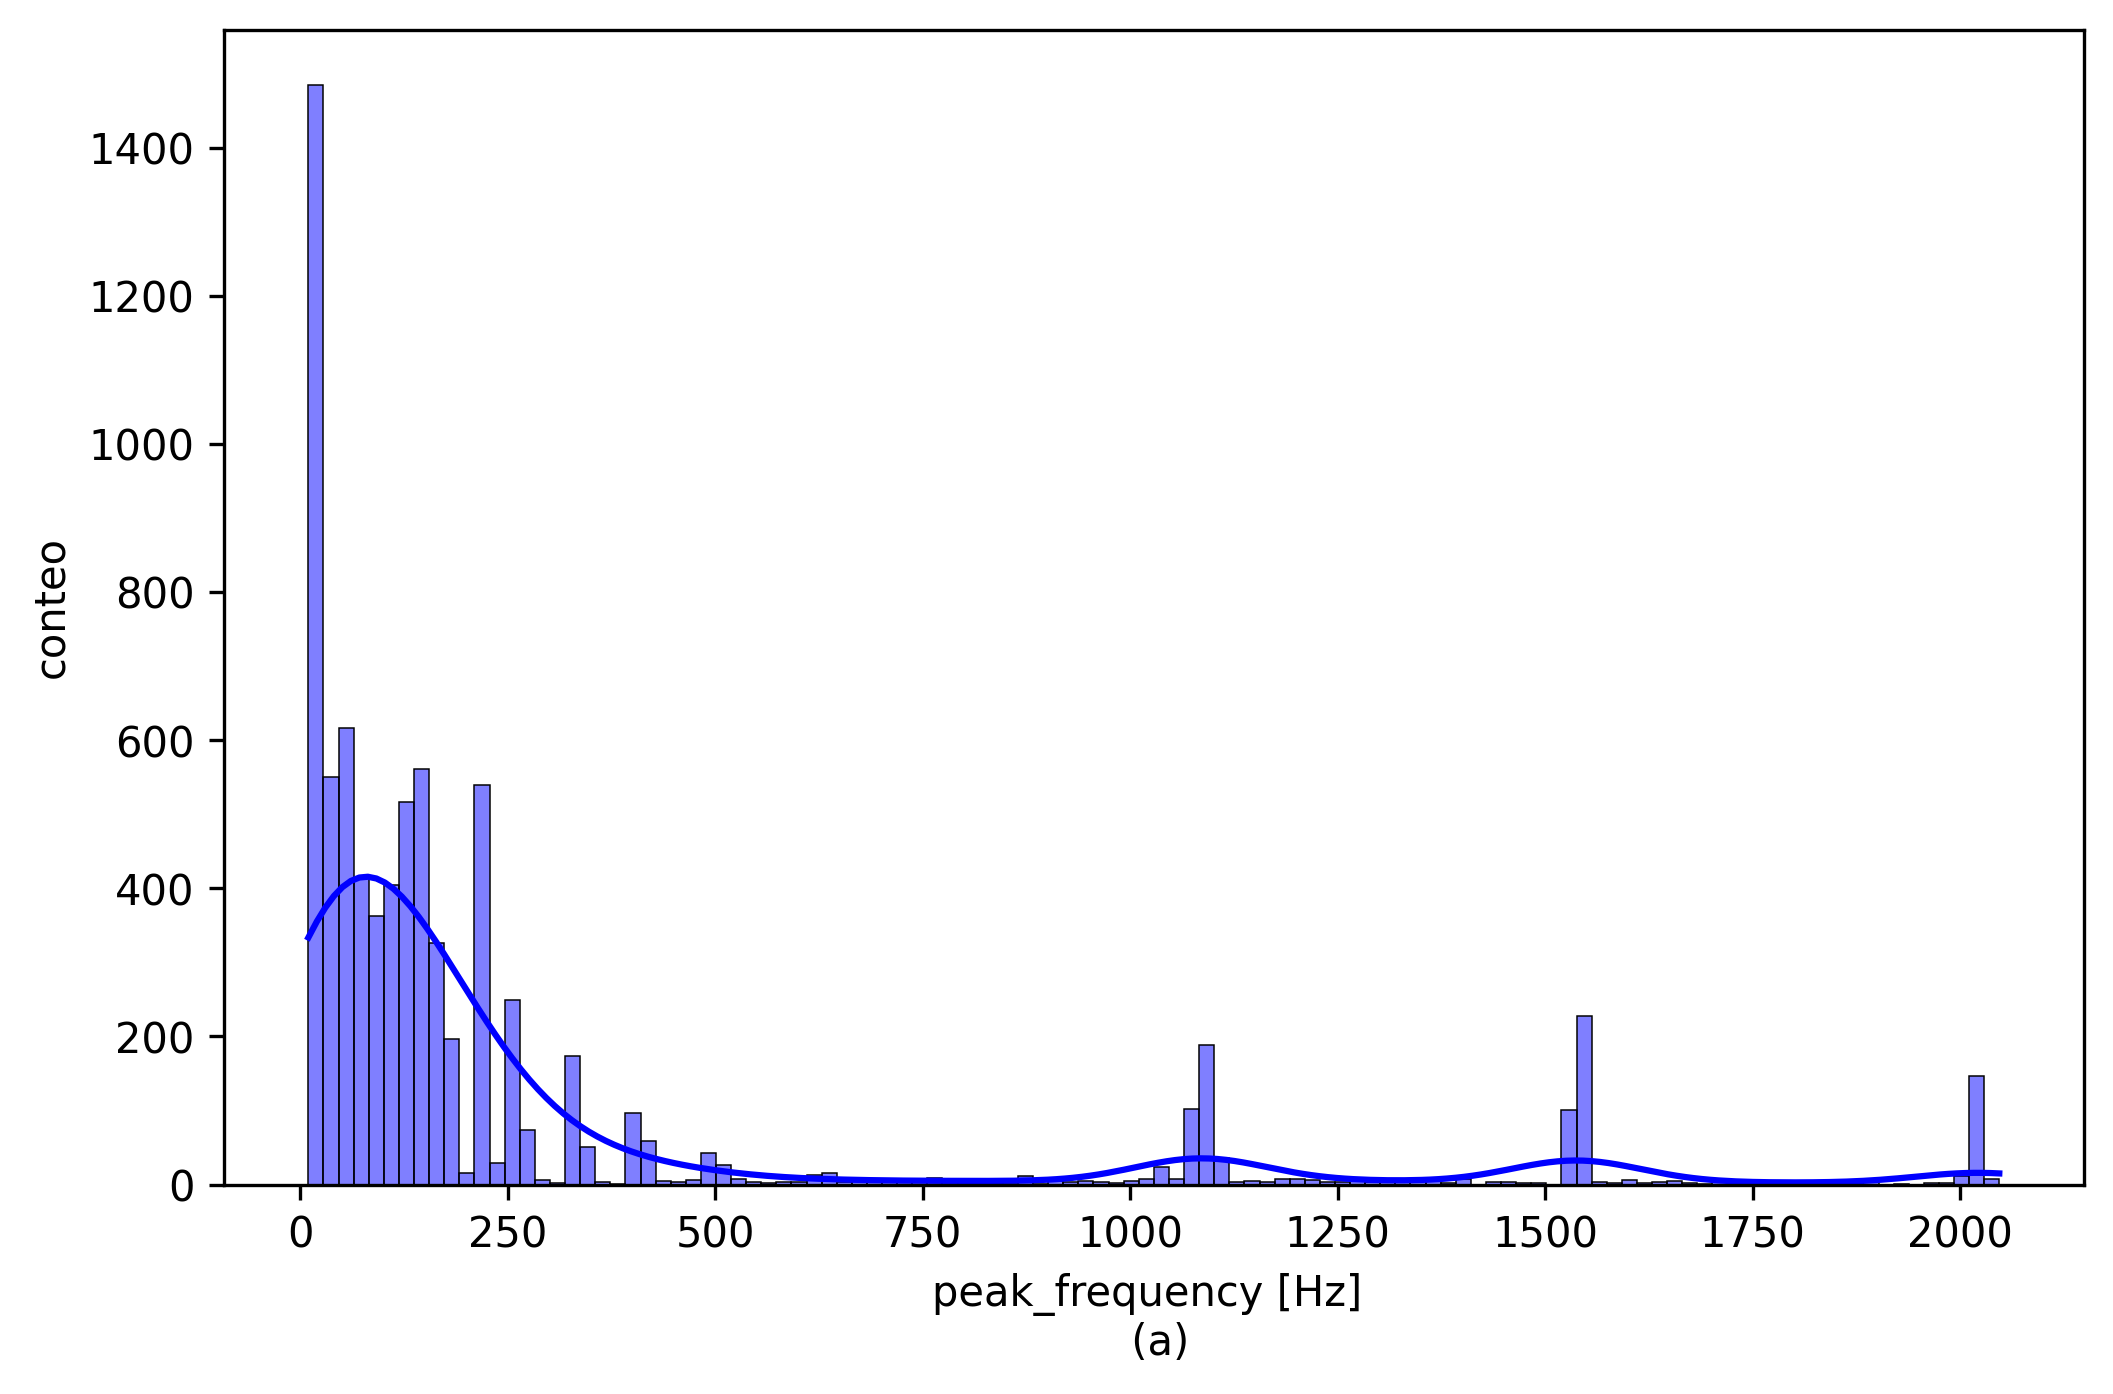

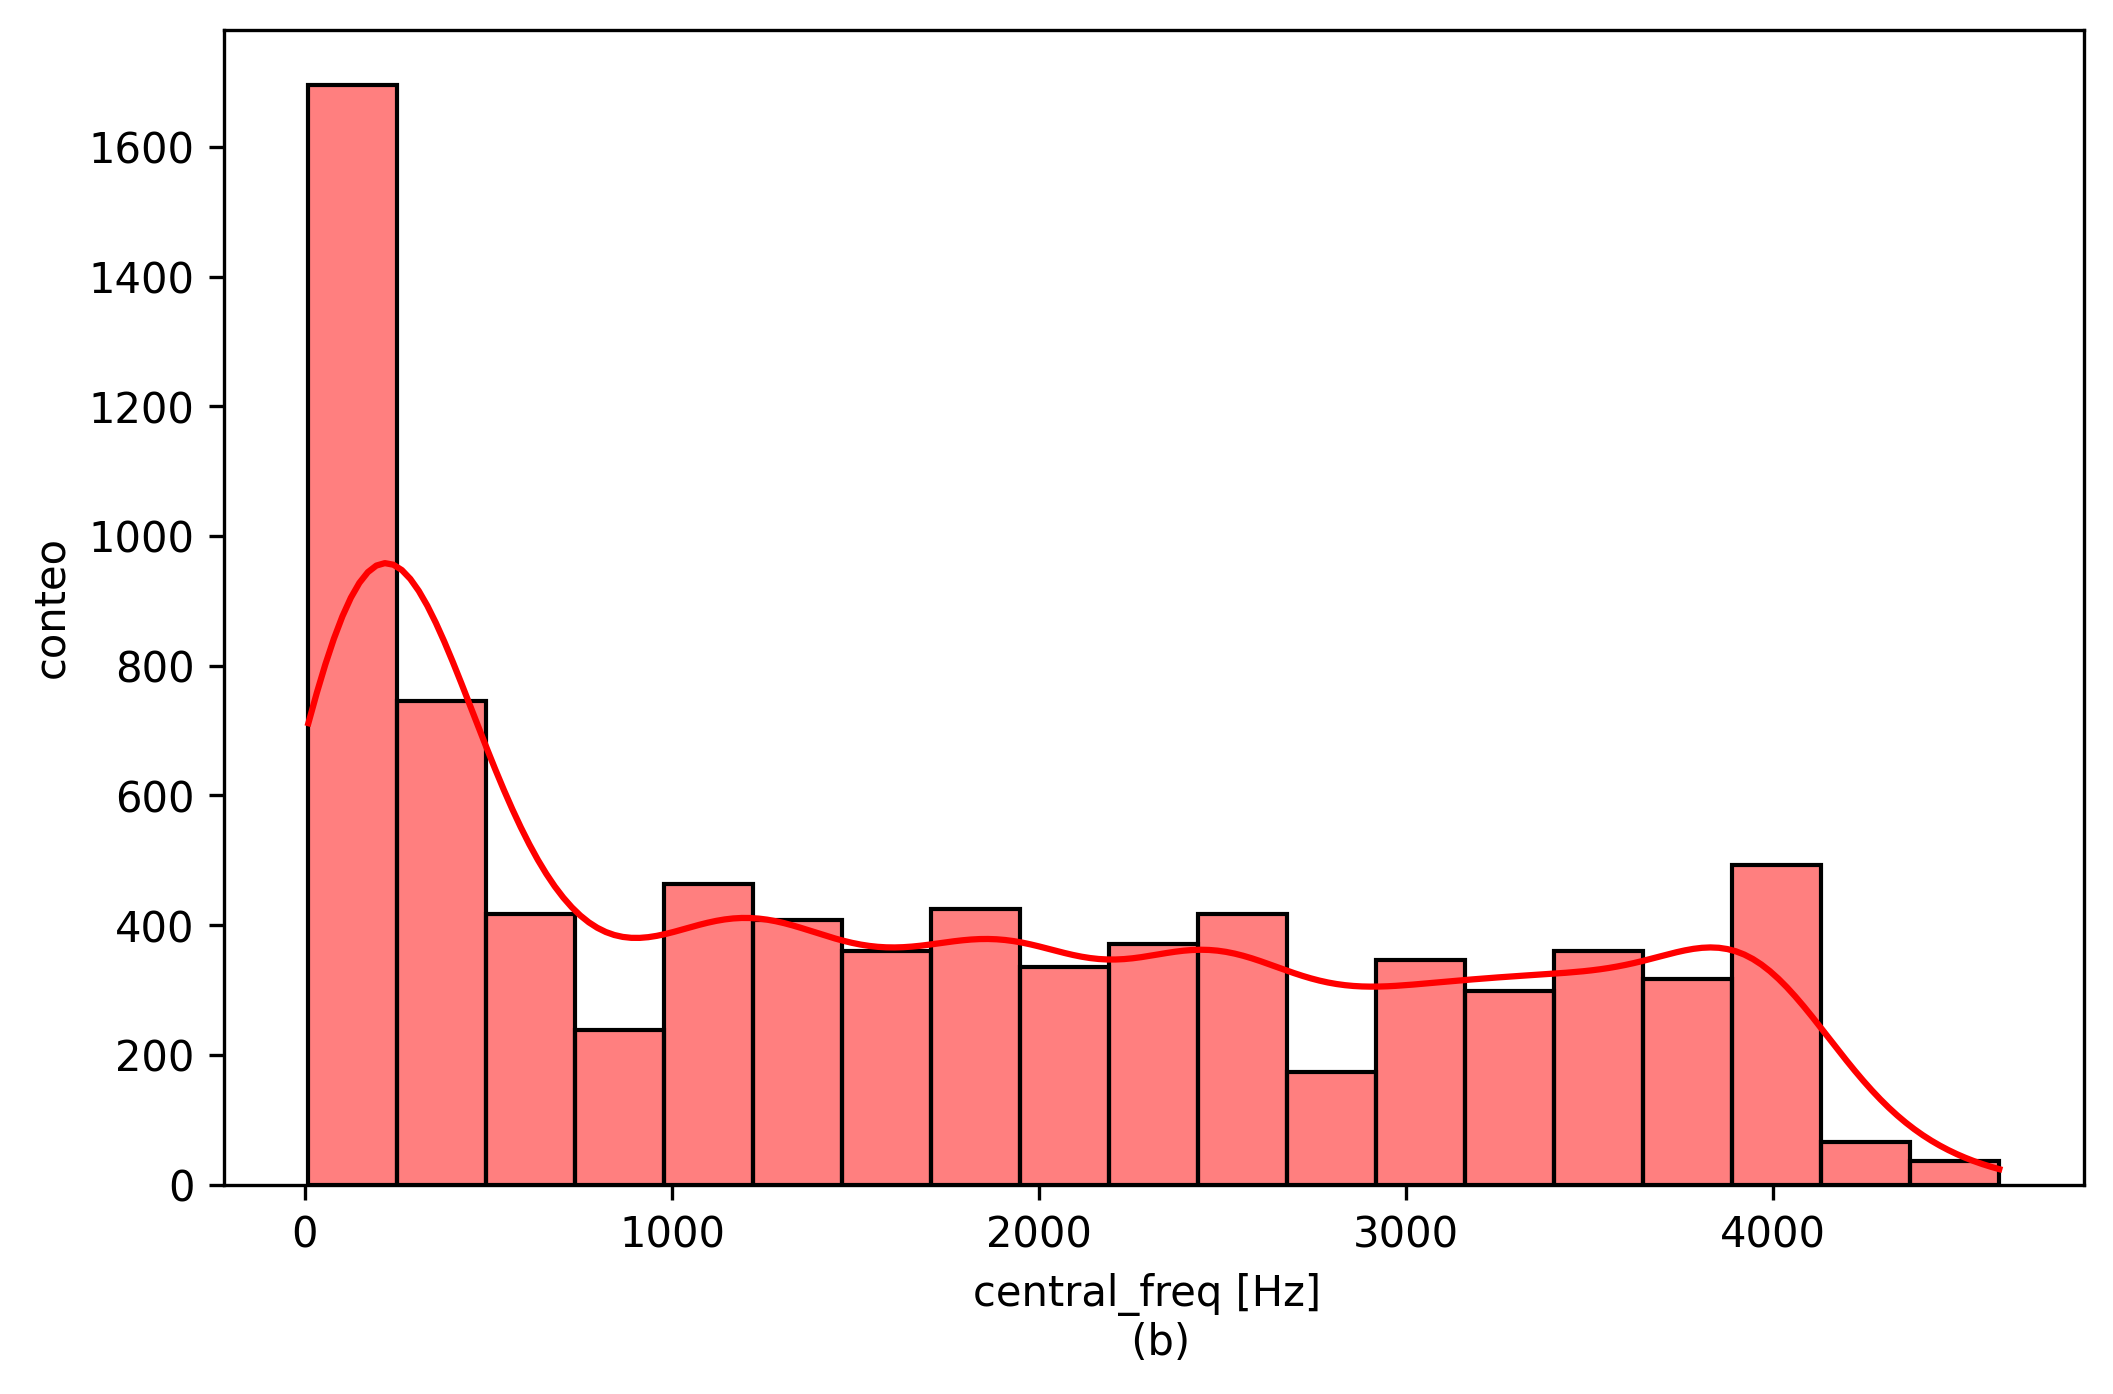

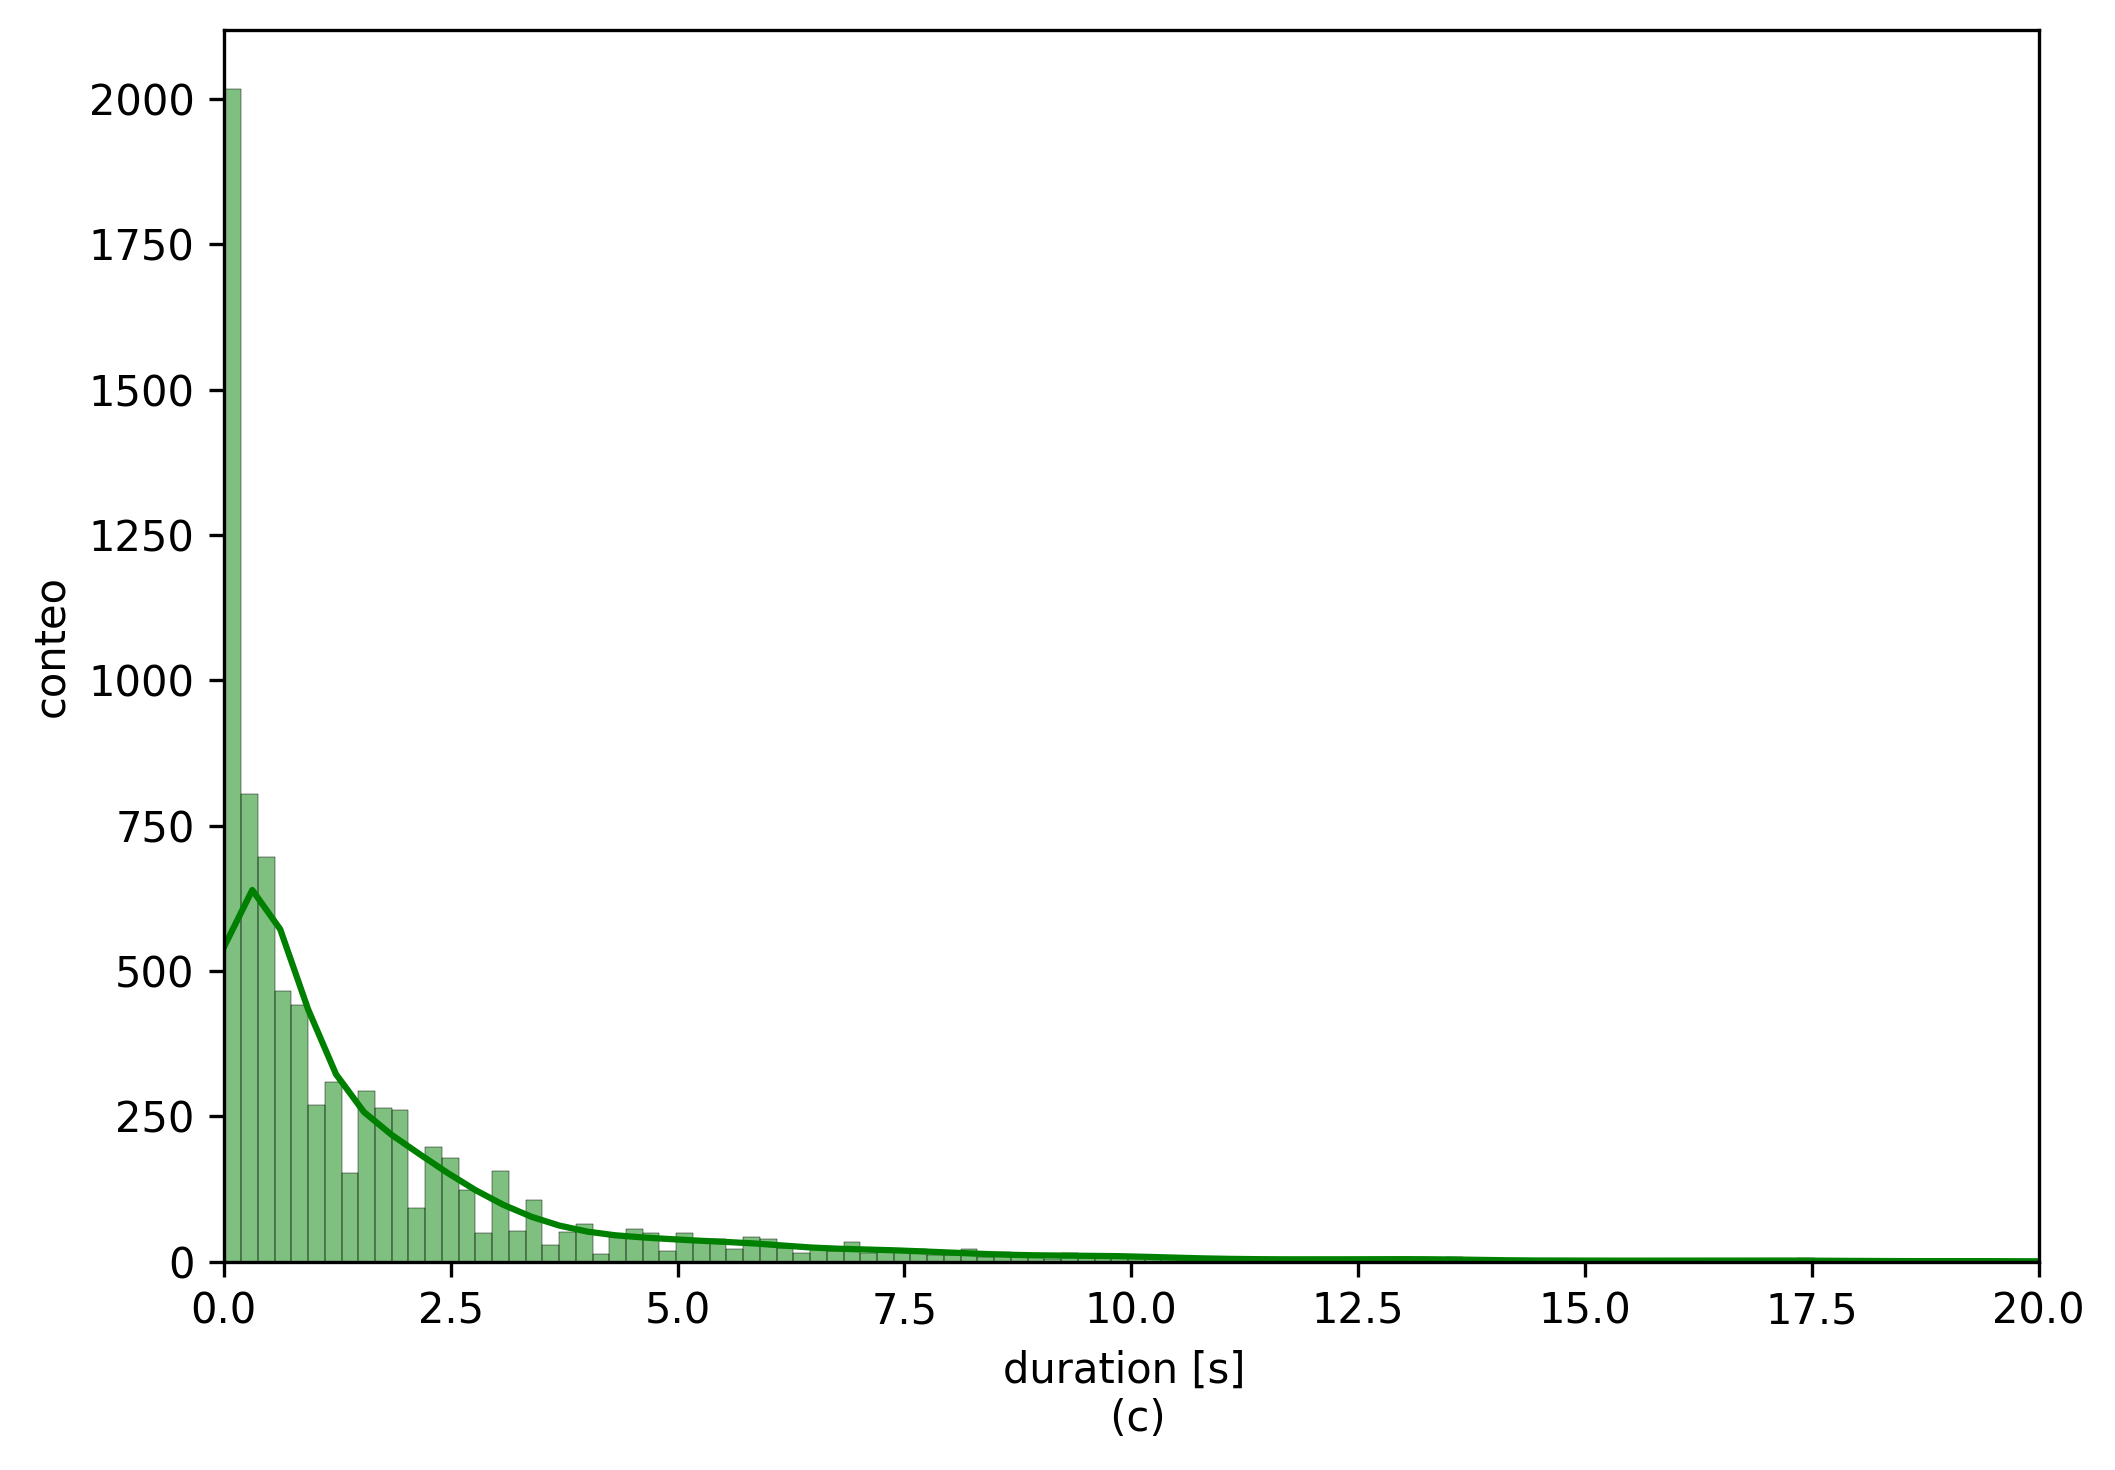

In [7]:
# Histogramas de parametros considerados como principales de los glitch's
plt.figure(figsize=(8,5))
sns.histplot(data = df, x="peak_frequency",kde=True,color='blue')
# Funcion de seaborn que hace un histograma del parametro "x" elegido del data set
plt.xlabel('peak_frequency [Hz] \n (a)')
plt.ylabel('conteo')
plt.figure(figsize=(8,5))
sns.histplot(data = df, x="central_freq",kde=True, color='red')
plt.xlabel('central_freq [Hz] \n (b)')
plt.ylabel('conteo')
plt.figure(figsize=(7.15,5))
sns.histplot(data = df, x="duration",kde=True, color='green')
plt.xlabel('duration [s] \n (c)')
plt.ylabel('conteo')
plt.xlim(0, 20)   
plt.tight_layout()
plt.show()

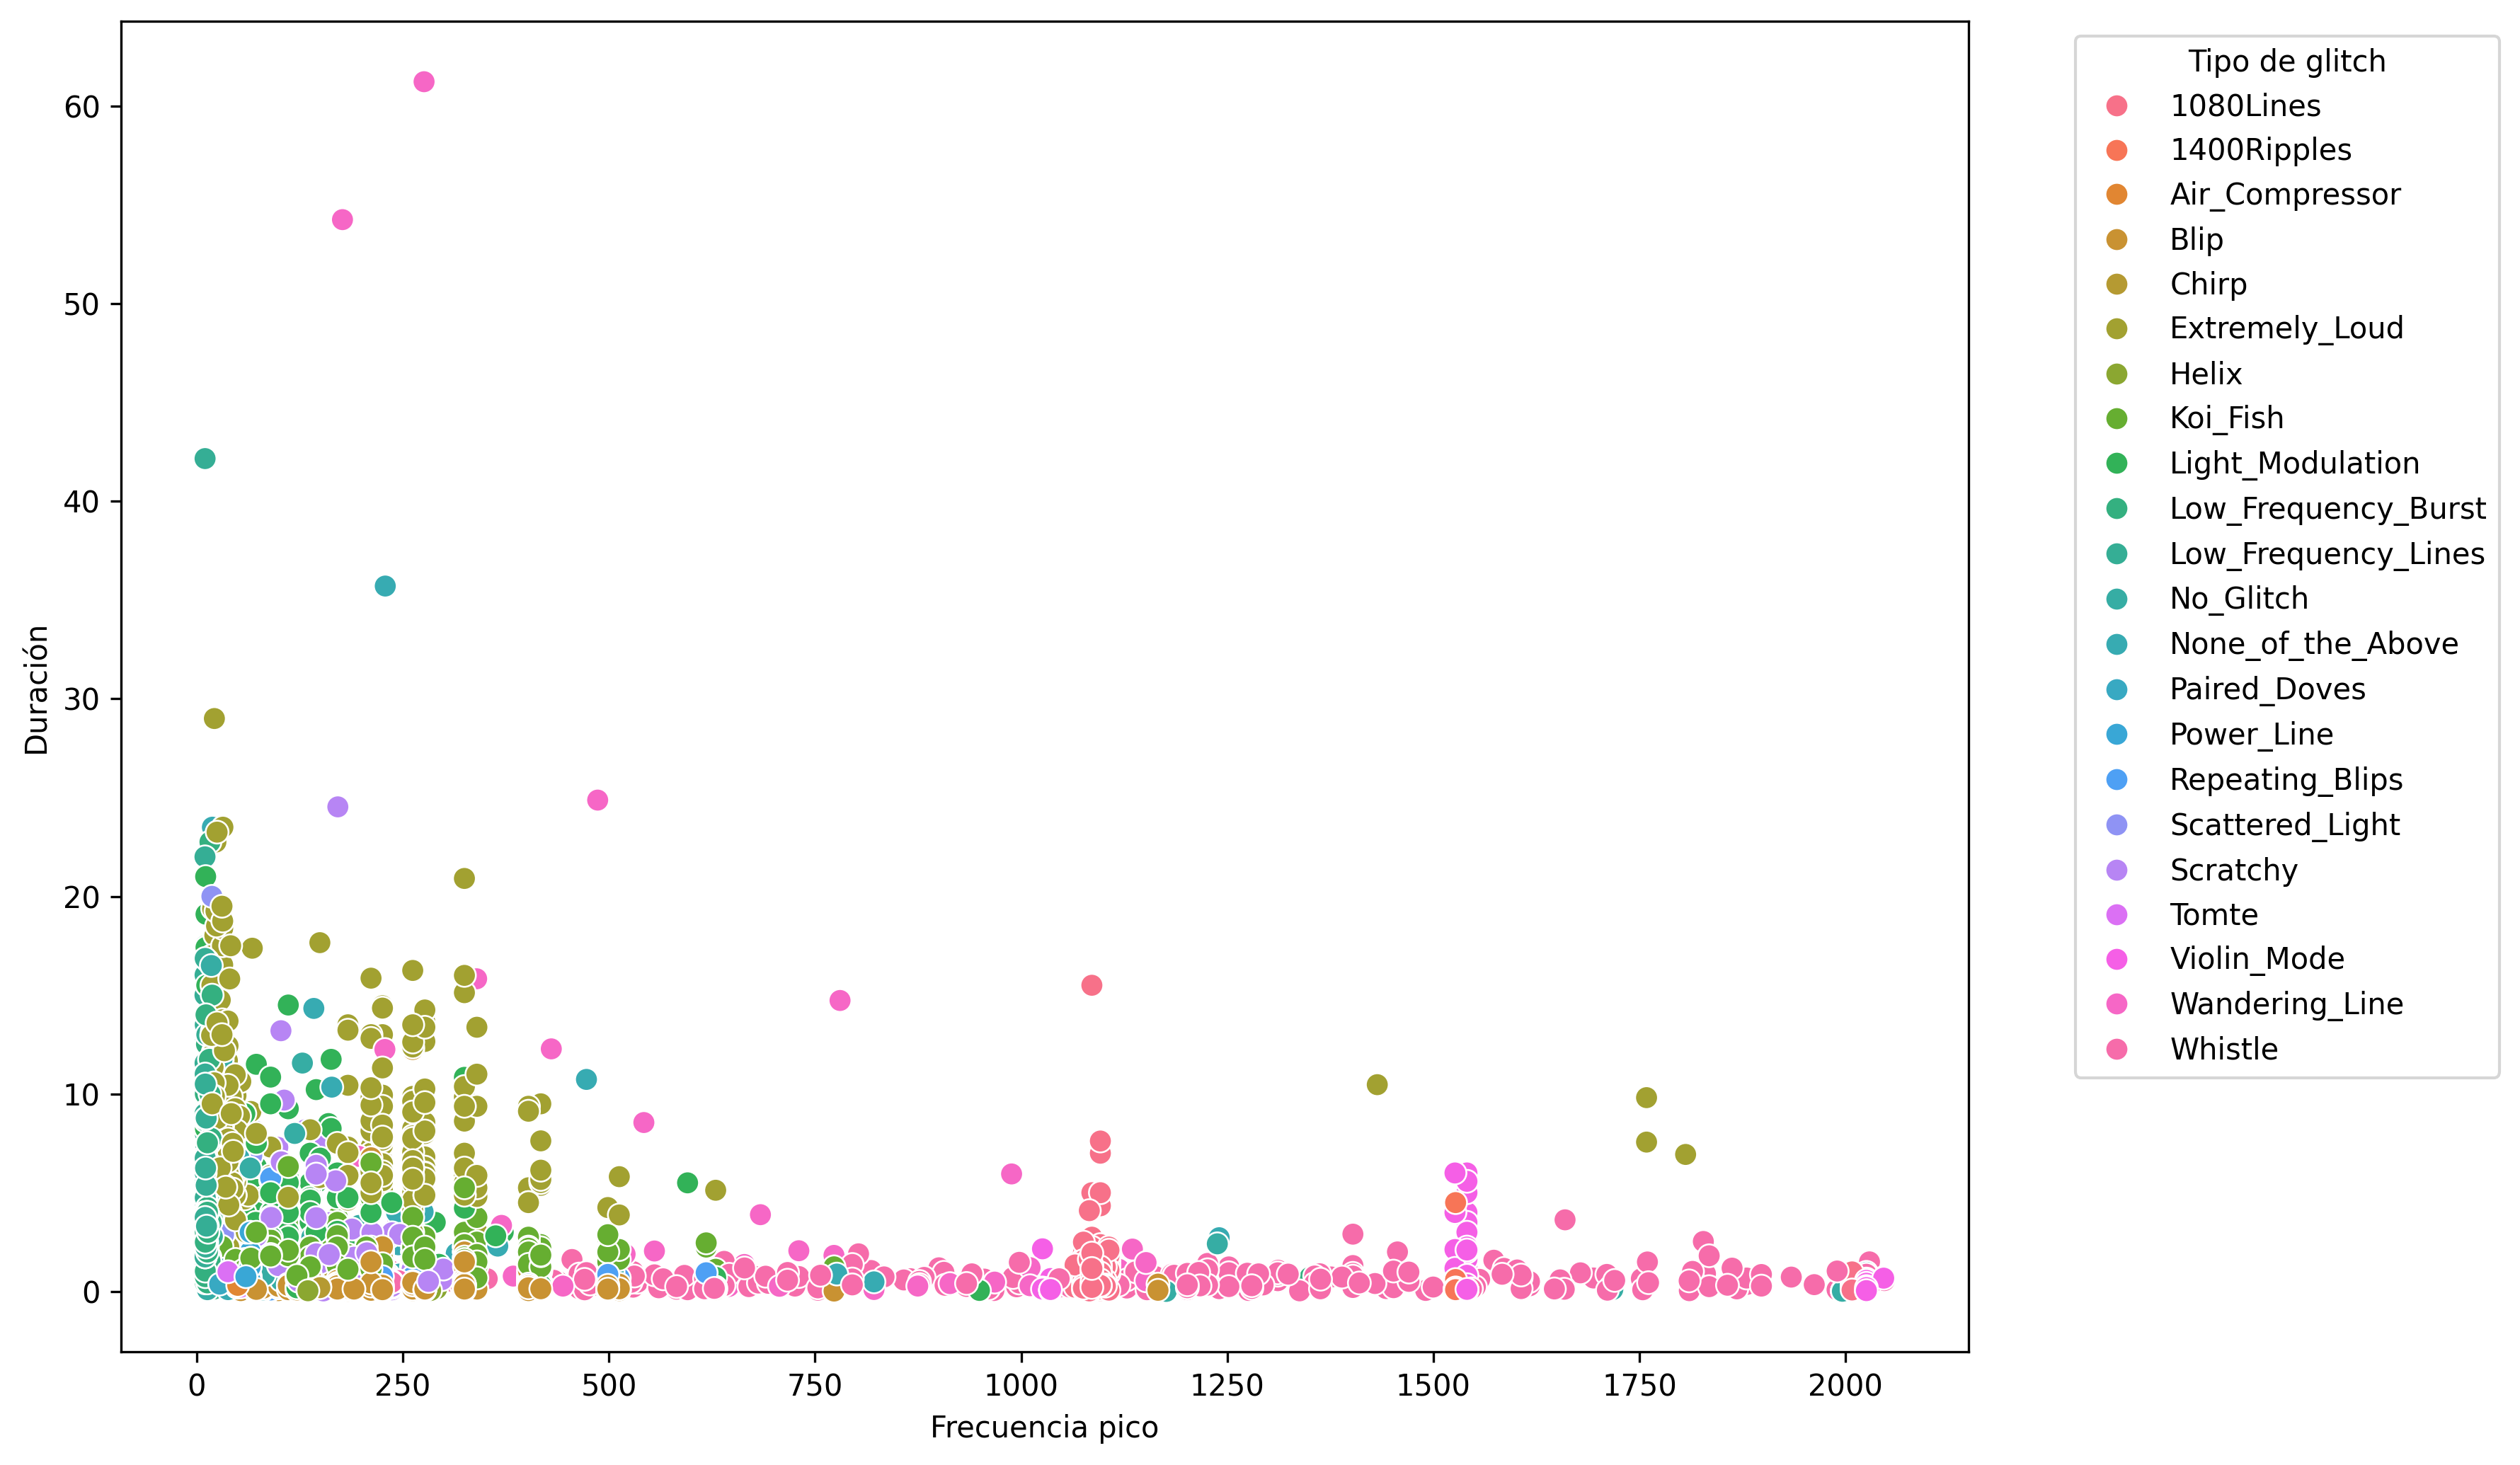

In [18]:
#NO COLOCAR

df_pv=df.copy()
df_pv['label']=df_pv['label'].astype('category')
df_pv['label'].cat.categories
plt.figure(figsize=(12,7))
g=sns.scatterplot(data=df_pv, x="peak_frequency", y="duration",hue='label',s=60) #intento de relación entre parametros ( no es posible ya que los datos no poseen una linea evolutiva, tammpoco de cada glitch)
plt.xlabel("Frecuencia pico")
plt.ylabel("Duración")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Tipo de glitch')
plt.tight_layout()
plt.show()

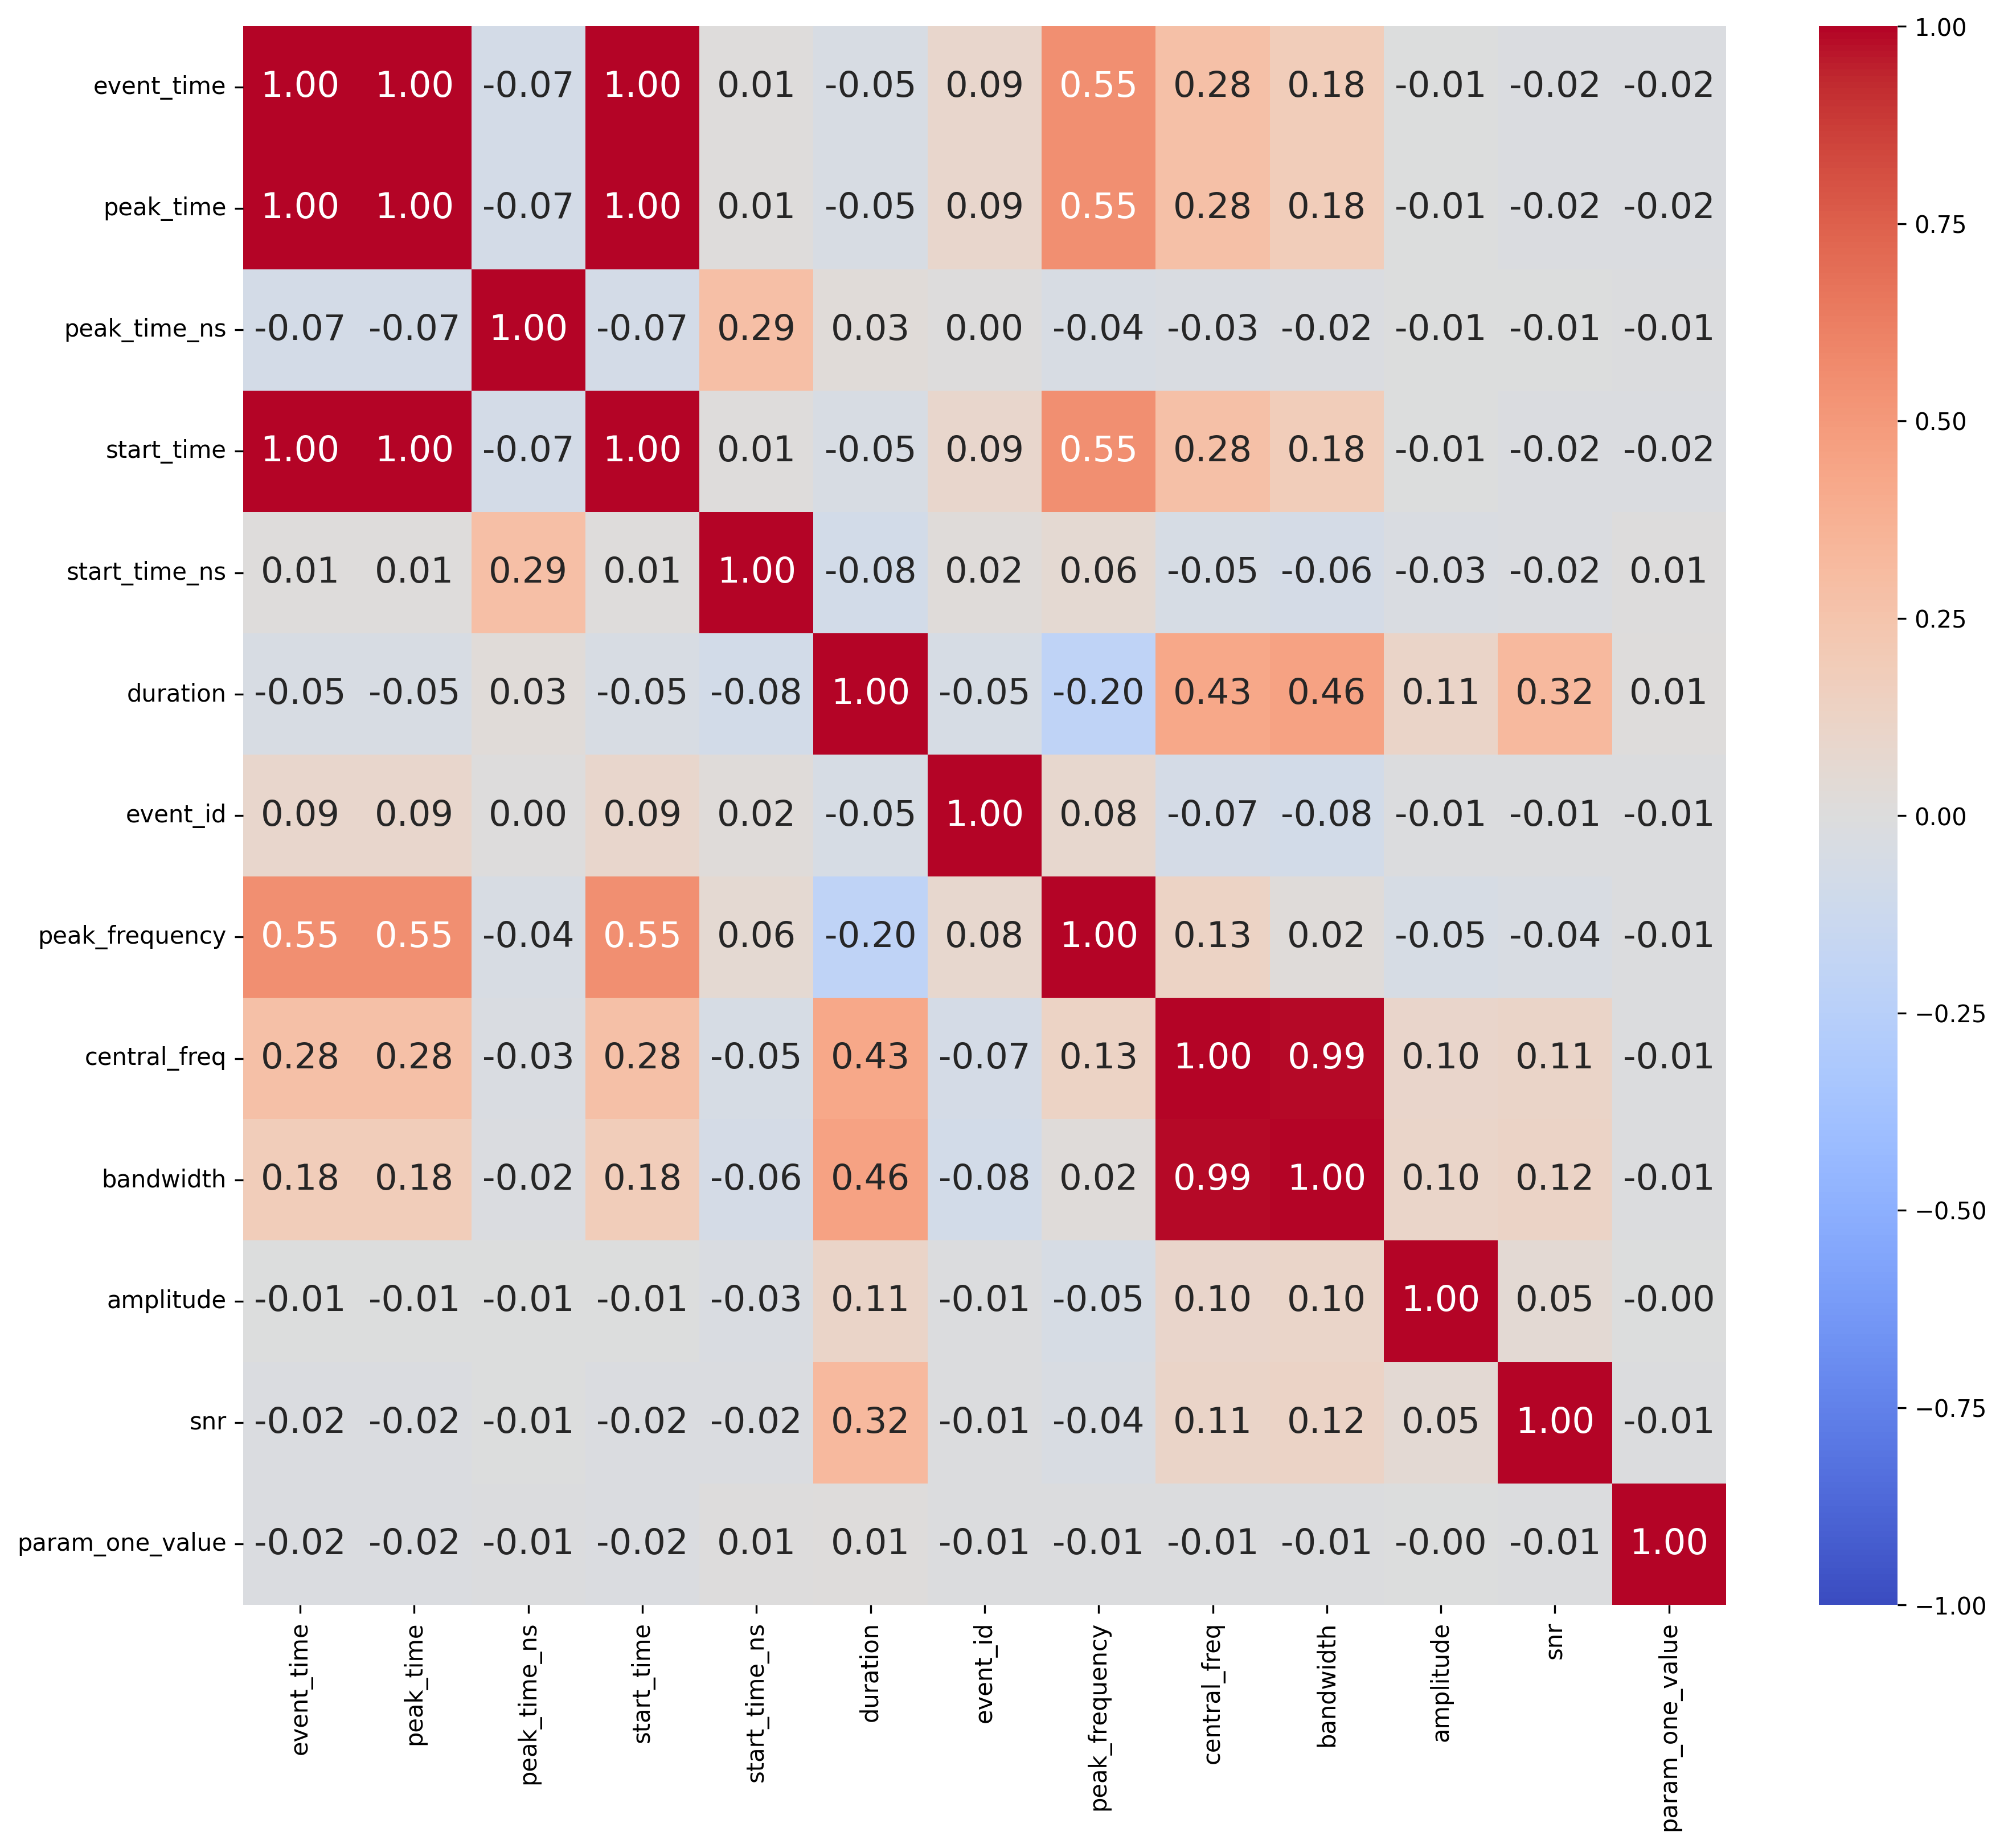

In [9]:
# MATRIZ DE CORRELACIÓN 
df_corre=df.copy()
variable_cate=df_corre.select_dtypes(include=['float64','int64']) 
# Selección de todos los parametros que alberguen información de tipo entero o flotante
correlacion=variable_cate.drop(columns=['process_id','confidence','chisq','chisq_dof']).corr()
# Borra los parametros irrelevantes en este analisis y aplica la funcción de correlación para 
# la posterior visualización de la matriz 
plt.figure(figsize=(14,12))
sns.heatmap(data=correlacion,vmin=-1,vmax=1,center=0,annot=True,fmt=".2f",cmap='coolwarm',annot_kws={"size": 15})
# mapa de calor para ver el nivel o grado de correlación entre parametros 
#plt.title('Matriz de Correlación')
plt.show()


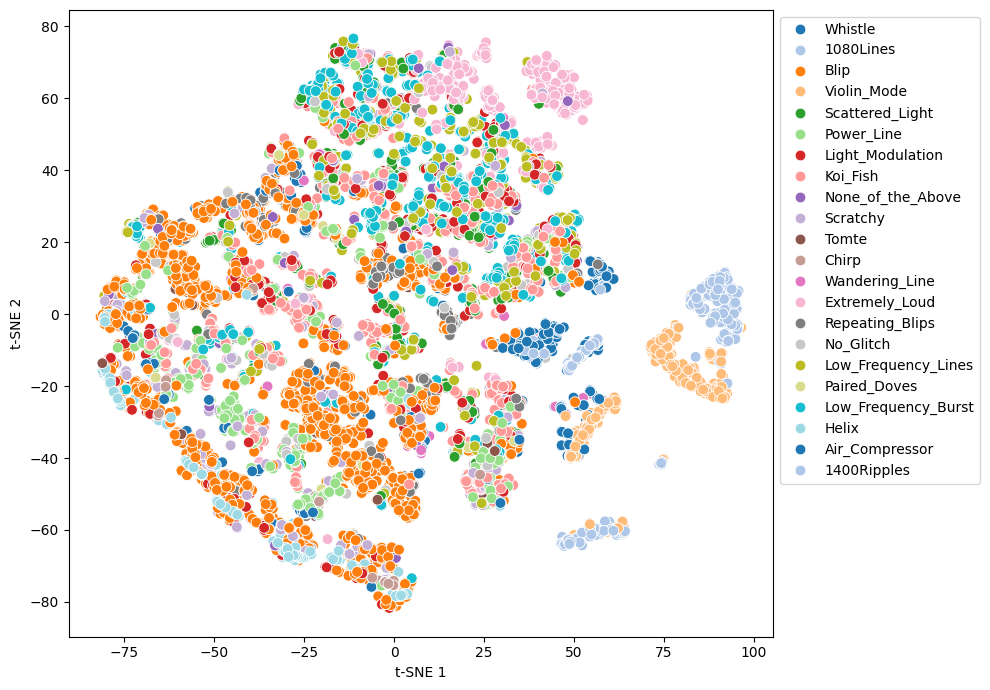

In [13]:
# Aplicación de t-SNE
#t-SNE es una técnica de reducción de dimensionalidad que se utiliza para visualizar datos de alta dimensionalidad 
# en un espacio de baja dimensionalidad (generalmente 2D o 3D).
x11=df_corre.drop(columns=['label','ifo','search','process_id','event_id','channel','confidence','chisq','chisq_dof', 'param_one_name', 'param_one_value', 'gravityspy_id', 'sample_type', 'url1', 'url2', 'url3', 'url4'])
# Eliminación de los parametros que no aportan en la visualización t-SNE
x11_scaled=StandardScaler().fit_transform(x11)
# Escalado del data set x11
tsne=TSNE(n_components=2,random_state=42,perplexity=30) 
# ajuste de los hiperparametros para dimensionalidad 2D, estado fijo aleatorio "42" 
# y perplejidad (calcula la similitud entre los puntos de datos ) de
#  "30", este valor es para tener un equilibrio entre el cálculo local 
# (tipo de glitch homogeneo) y global (relación con lasqemad categorías) 
x11_tsne=tsne.fit_transform(x11_scaled)
plt.figure(figsize=(10,7))
sns.scatterplot(x=x11_tsne[:,0],y=x11_tsne[:,1],hue=df_corre['label'],palette='tab20',s=60)
#Grafico de dispersión 
#plt.title("Visualización t-SNE de tipos de glitches")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [16]:
display(df)

event_time ifo   peak_time  peak_time_ns  start_time  start_time_ns  \
0     1.134216e+09  L1  1134216192     931639909  1134216192      832031011   
1     1.129360e+09  L1  1129359781     558593034  1129359781       47851085   
2     1.127425e+09  L1  1127425468     976317882  1127425468      960937023   
3     1.132637e+09  L1  1132636755     365233898  1132636754      951172113   
4     1.132036e+09  L1  1132035853     197264909  1132035852      933837890   
...            ...  ..         ...           ...         ...            ...   
7961  1.127688e+09  L1  1127688297     710937023  1127688292              0   
7962  1.128422e+09  L1  1128421736     324218034  1128421736      304687023   
7963  1.164774e+09  H1  1164773536     433593034  1164773535      911376953   
7964  1.163790e+09  L1  1163789867     496093034  1163789867      476562023   
7965  1.166335e+09  H1  1166334944     306639909  1166334940      703125000   

      duration   search  process_id  event_id  peak_frequency  central_freq  \
0      0.18750  Omicron           0        21     1337.695312   1120.043213   
1      0.94238  Omicron           0       107      654.747681   1823.073364   
2      0.04688  Omicron           0       218     1337.827515   2024.177490   
3      0.82422  Omicron           0        88     1182.974609   3981.774658   
4      2.00366  Omicron           0        16     1456.511353   3979.026855   
...        ...      ...         ...       ...             ...           ...   
7961   9.00391  Omicron           0       182       41.940331   1972.764160   
7962   0.03906  Omicron           0       396      134.965424    202.500534   
7963   1.16675  OMICRON           0      1817     1085.830078   4001.193115   
7964   0.10156  OMICRON           0       501     1035.676880   2051.402832   
7965   4.09375  OMICRON           0      4883     1082.743164   3979.047363   

        bandwidth           channel     amplitude          snr  confidence  \
0      573.363953  GDS-CALIB_STRAIN  1.197650e-22     7.511390           0   
1     3426.576416  GDS-CALIB_STRAIN  8.255850e-23     9.630130           0   
2     3778.701904  GDS-CALIB_STRAIN  9.762940e-22    15.371040           0   
3     7492.717773  GDS-CALIB_STRAIN  1.462120e-22    10.321160           0   
4     7942.912109  GDS-CALIB_STRAIN  4.038300e-22    14.380160           0   
...           ...               ...           ...          ...         ...   
7961  3881.528320  GDS-CALIB_STRAIN  2.120510e-19  1033.286987           0   
7962   170.593903  GDS-CALIB_STRAIN  5.184990e-22     8.623000           0   
7963  7898.579102  GDS-CALIB_STRAIN  4.994010e-22    19.424089           0   
7964  2131.378662  GDS-CALIB_STRAIN  2.744010e-22     8.651070           0   
7965  7942.870605  GDS-CALIB_STRAIN  2.673990e-22    11.485420           0   

      chisq  chisq_dof param_one_name  param_one_value gravityspy_id  \
0         0          0          phase         -2.72902    zmIdpucyOG   
1         0          0          phase          1.10682    zWFRqqDxwv   
2         0          0          phase         -0.83099    zKCTakFVcf   
3         0          0          phase          0.76242    z14BdoiFZS   
4         0          0          phase         -0.31161    yyjqLCtAmO   
...     ...        ...            ...              ...           ...   
7961      0          0          phase         -2.48491    K4lUik19zL   
7962      0          0          phase          1.32651    EkRSkrpPet   
7963      0          0          phase          2.72929    xyLhvRKzzX   
7964      0          0          phase          0.66486    lshKvhcRcT   
7965      0          0          phase          0.48181    rVtNKB41sZ   

               label sample_type  \
0            Whistle       train   
1            Whistle        test   
2            Whistle       train   
3            Whistle  validation   
4            Whistle  validation   
...              ...         ...   
7961  Extremely_Loud       train   
7962           Helix

# RANDOM FOREST

In [10]:

x=df1[['snr','peak_time','duration','param_one_value','central_freq','bandwidth','event_time','peak_frequency']] 
# features o parametros explicativos con las que estudia el modelo.
y=df1['label']
# etiqueta que contiene el tipo de glitch
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# las variabes "x_train,x_test,y_train,y_test" contienen el porcentaje de 
#información de entrenamiento y de prueba o testeo del modelo tanto de los 
#como de las etiquetas
scal=StandardScaler()
#Escalado de los datos para que el modelo trabaje los datos 
x_train_encode=scal.fit_transform(x_train)
x_test_encode=scal.transform(x_test)
model=RandomForestClassifier(n_estimators=100,max_features='log2',random_state=42) 
# Configuración de hiperparametros del modelo de clasificación donde se usaron 100 arboles
#El modelo toma el logaritmo de base 2'log2' de la cantidad total de caracteristicas usadas
#para formar los nodos del arbol, en base a ese resultado, será la cantidad de parametros
#aleatorios que se destinan a los nodos
#para n_estimators=10, accuracy variable es de 99.36
model.fit(x_train,y_train) 
#Ejecución o fitteo del modelo
y_pred=model.predict(x_test)
#en base al estudio hecho por el modelo, se creará una variable "y_pred" que 
#contendrá las predicciones hechas por el mismo respecto a la variable de testeo previamente 
#creada
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")
#visualización de la predicción del modelo
y_pred_train = model.predict(x_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Train Accuracy: {100 * accuracy:.2f}%")
#Validación de la precisión de predicciópon y clasificación respecto a los datos de entrenamiento 
#(Que porcentaje de los datos que estudió el modelo, es capaz de volver a interpretar
# y clasificar de forma correcta)

Precisión del modelo: 0.9109
Train Accuracy: 100.00%


In [18]:
display(x_train_smote.shape)

(32054, 8)

In [ ]:
# VALIDACIÓN DE HIPER PARAMETROS 

rf = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',   
    cv=5,                 
    n_jobs=-1,            
    verbose=2
)


grid_search.fit(x_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor score en CV:", grid_search.best_score_)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score en CV: 0.8383488415057574


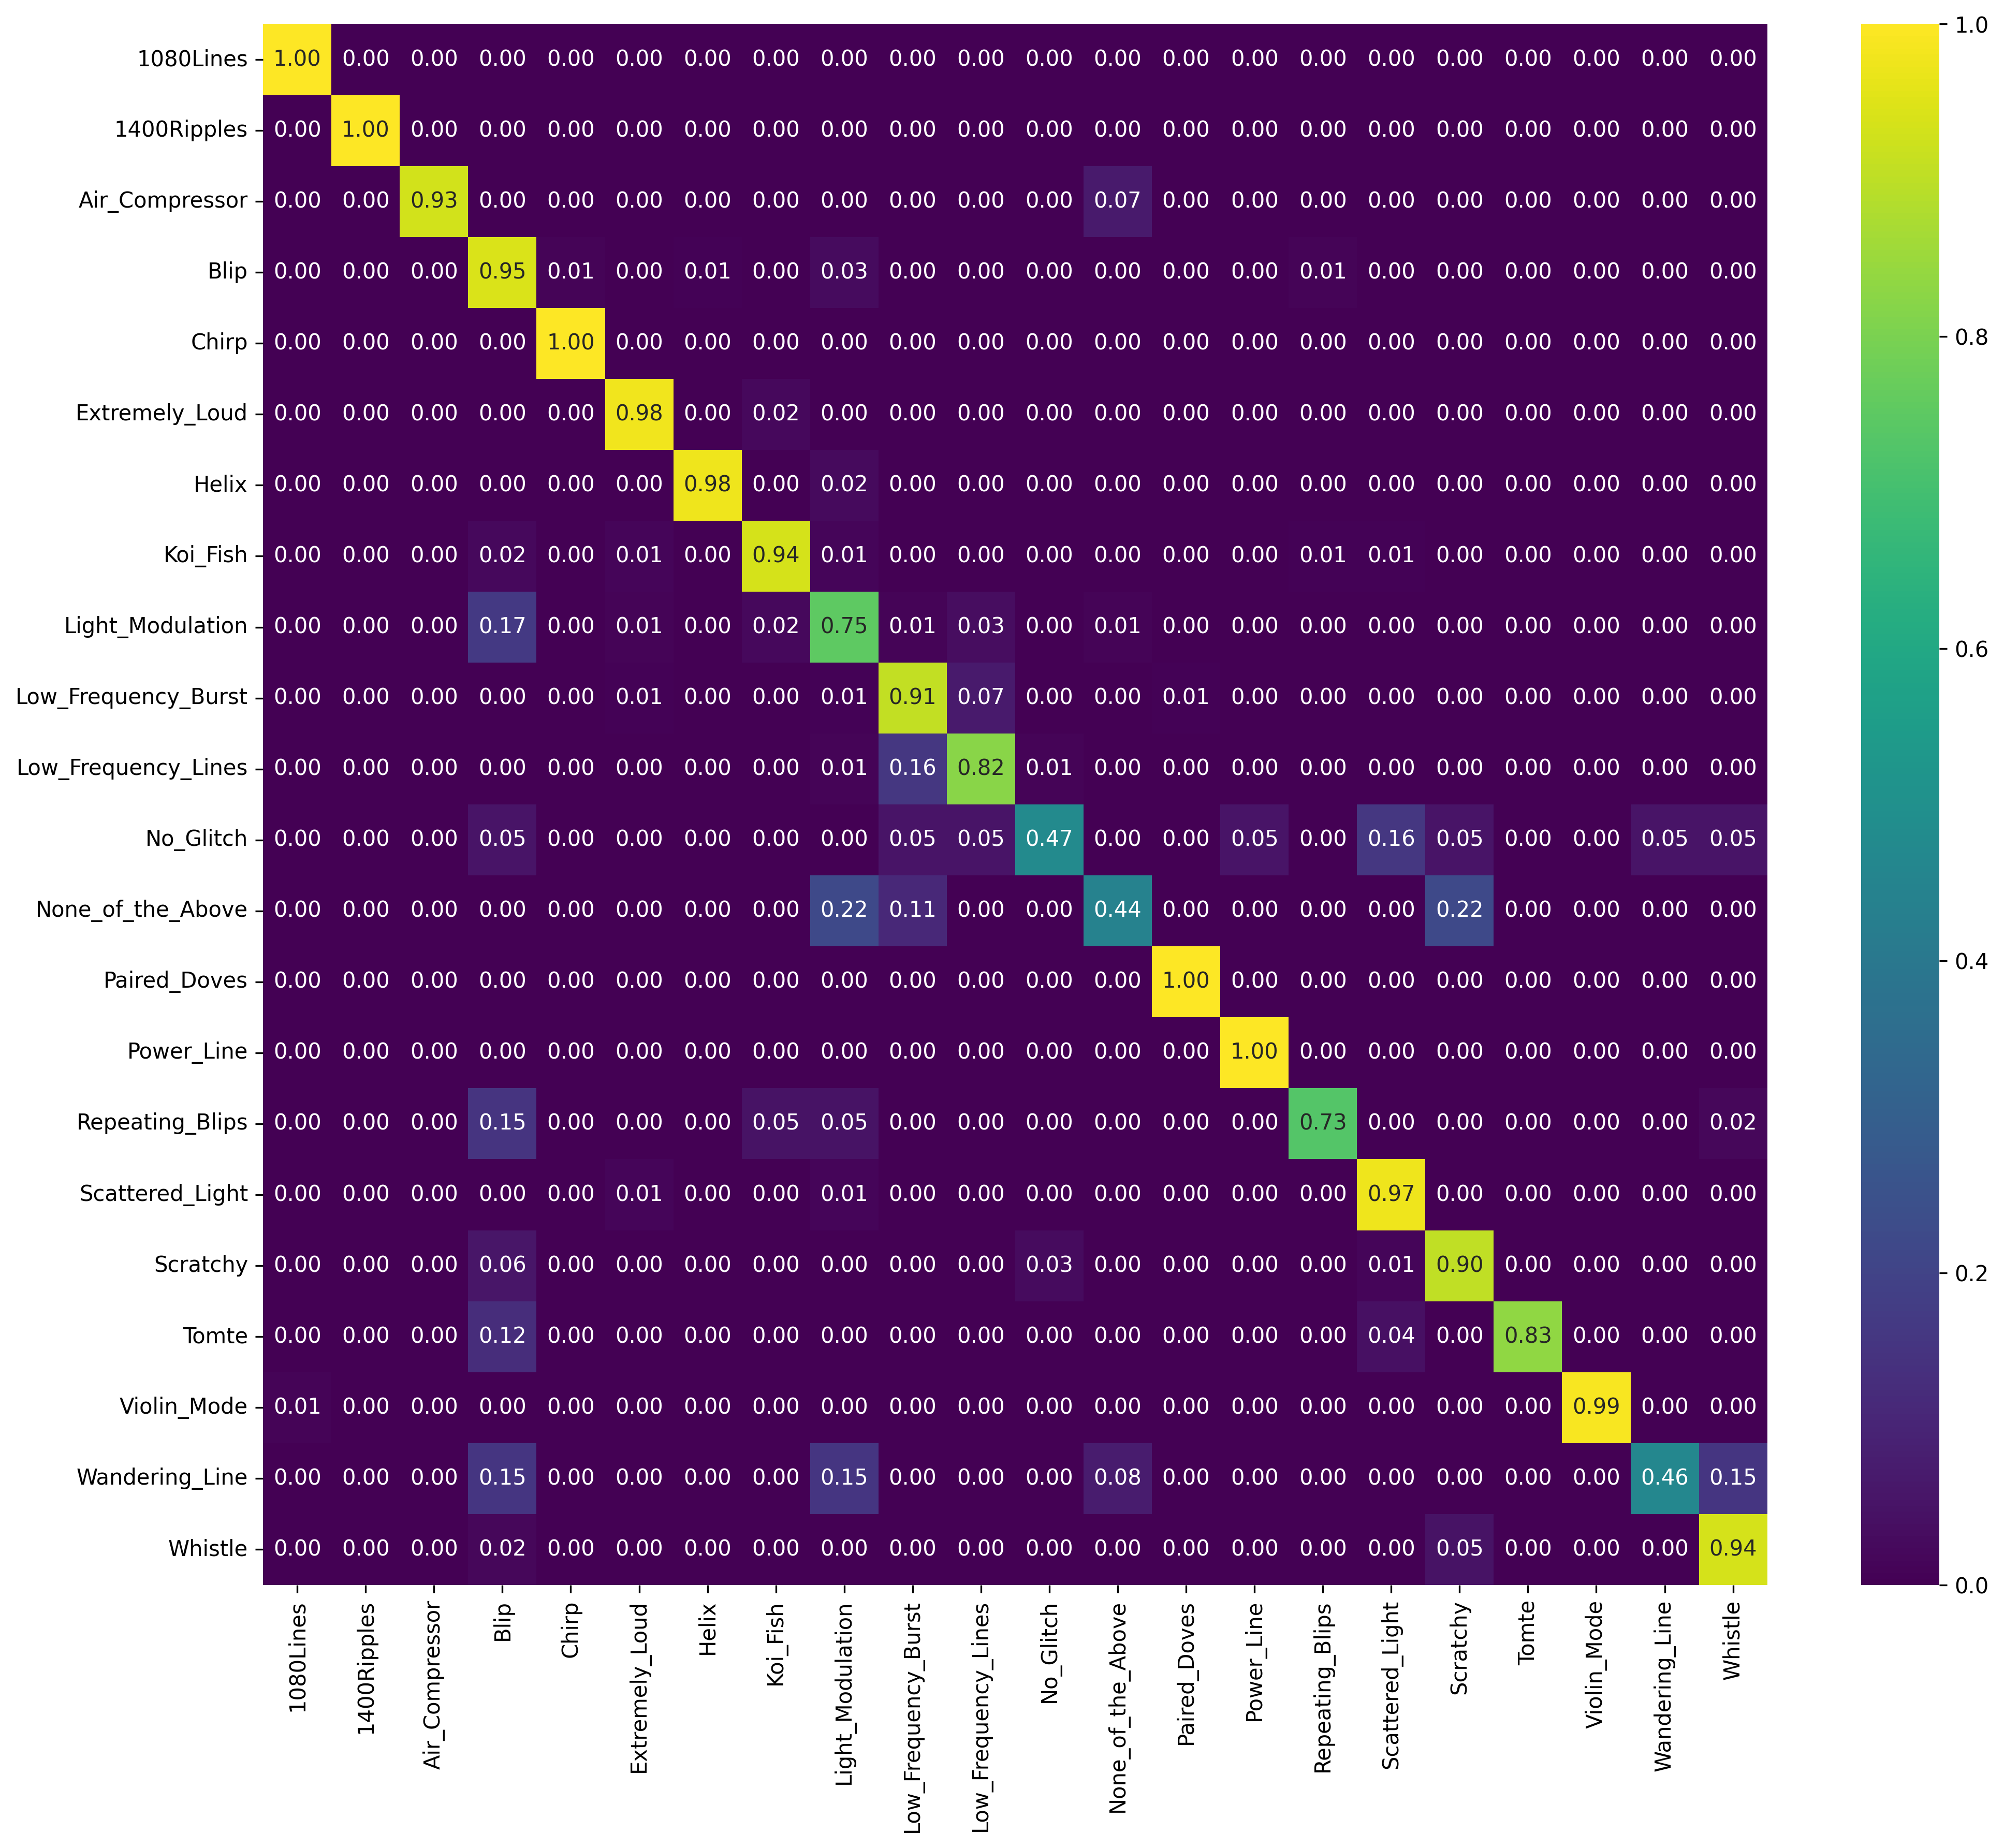

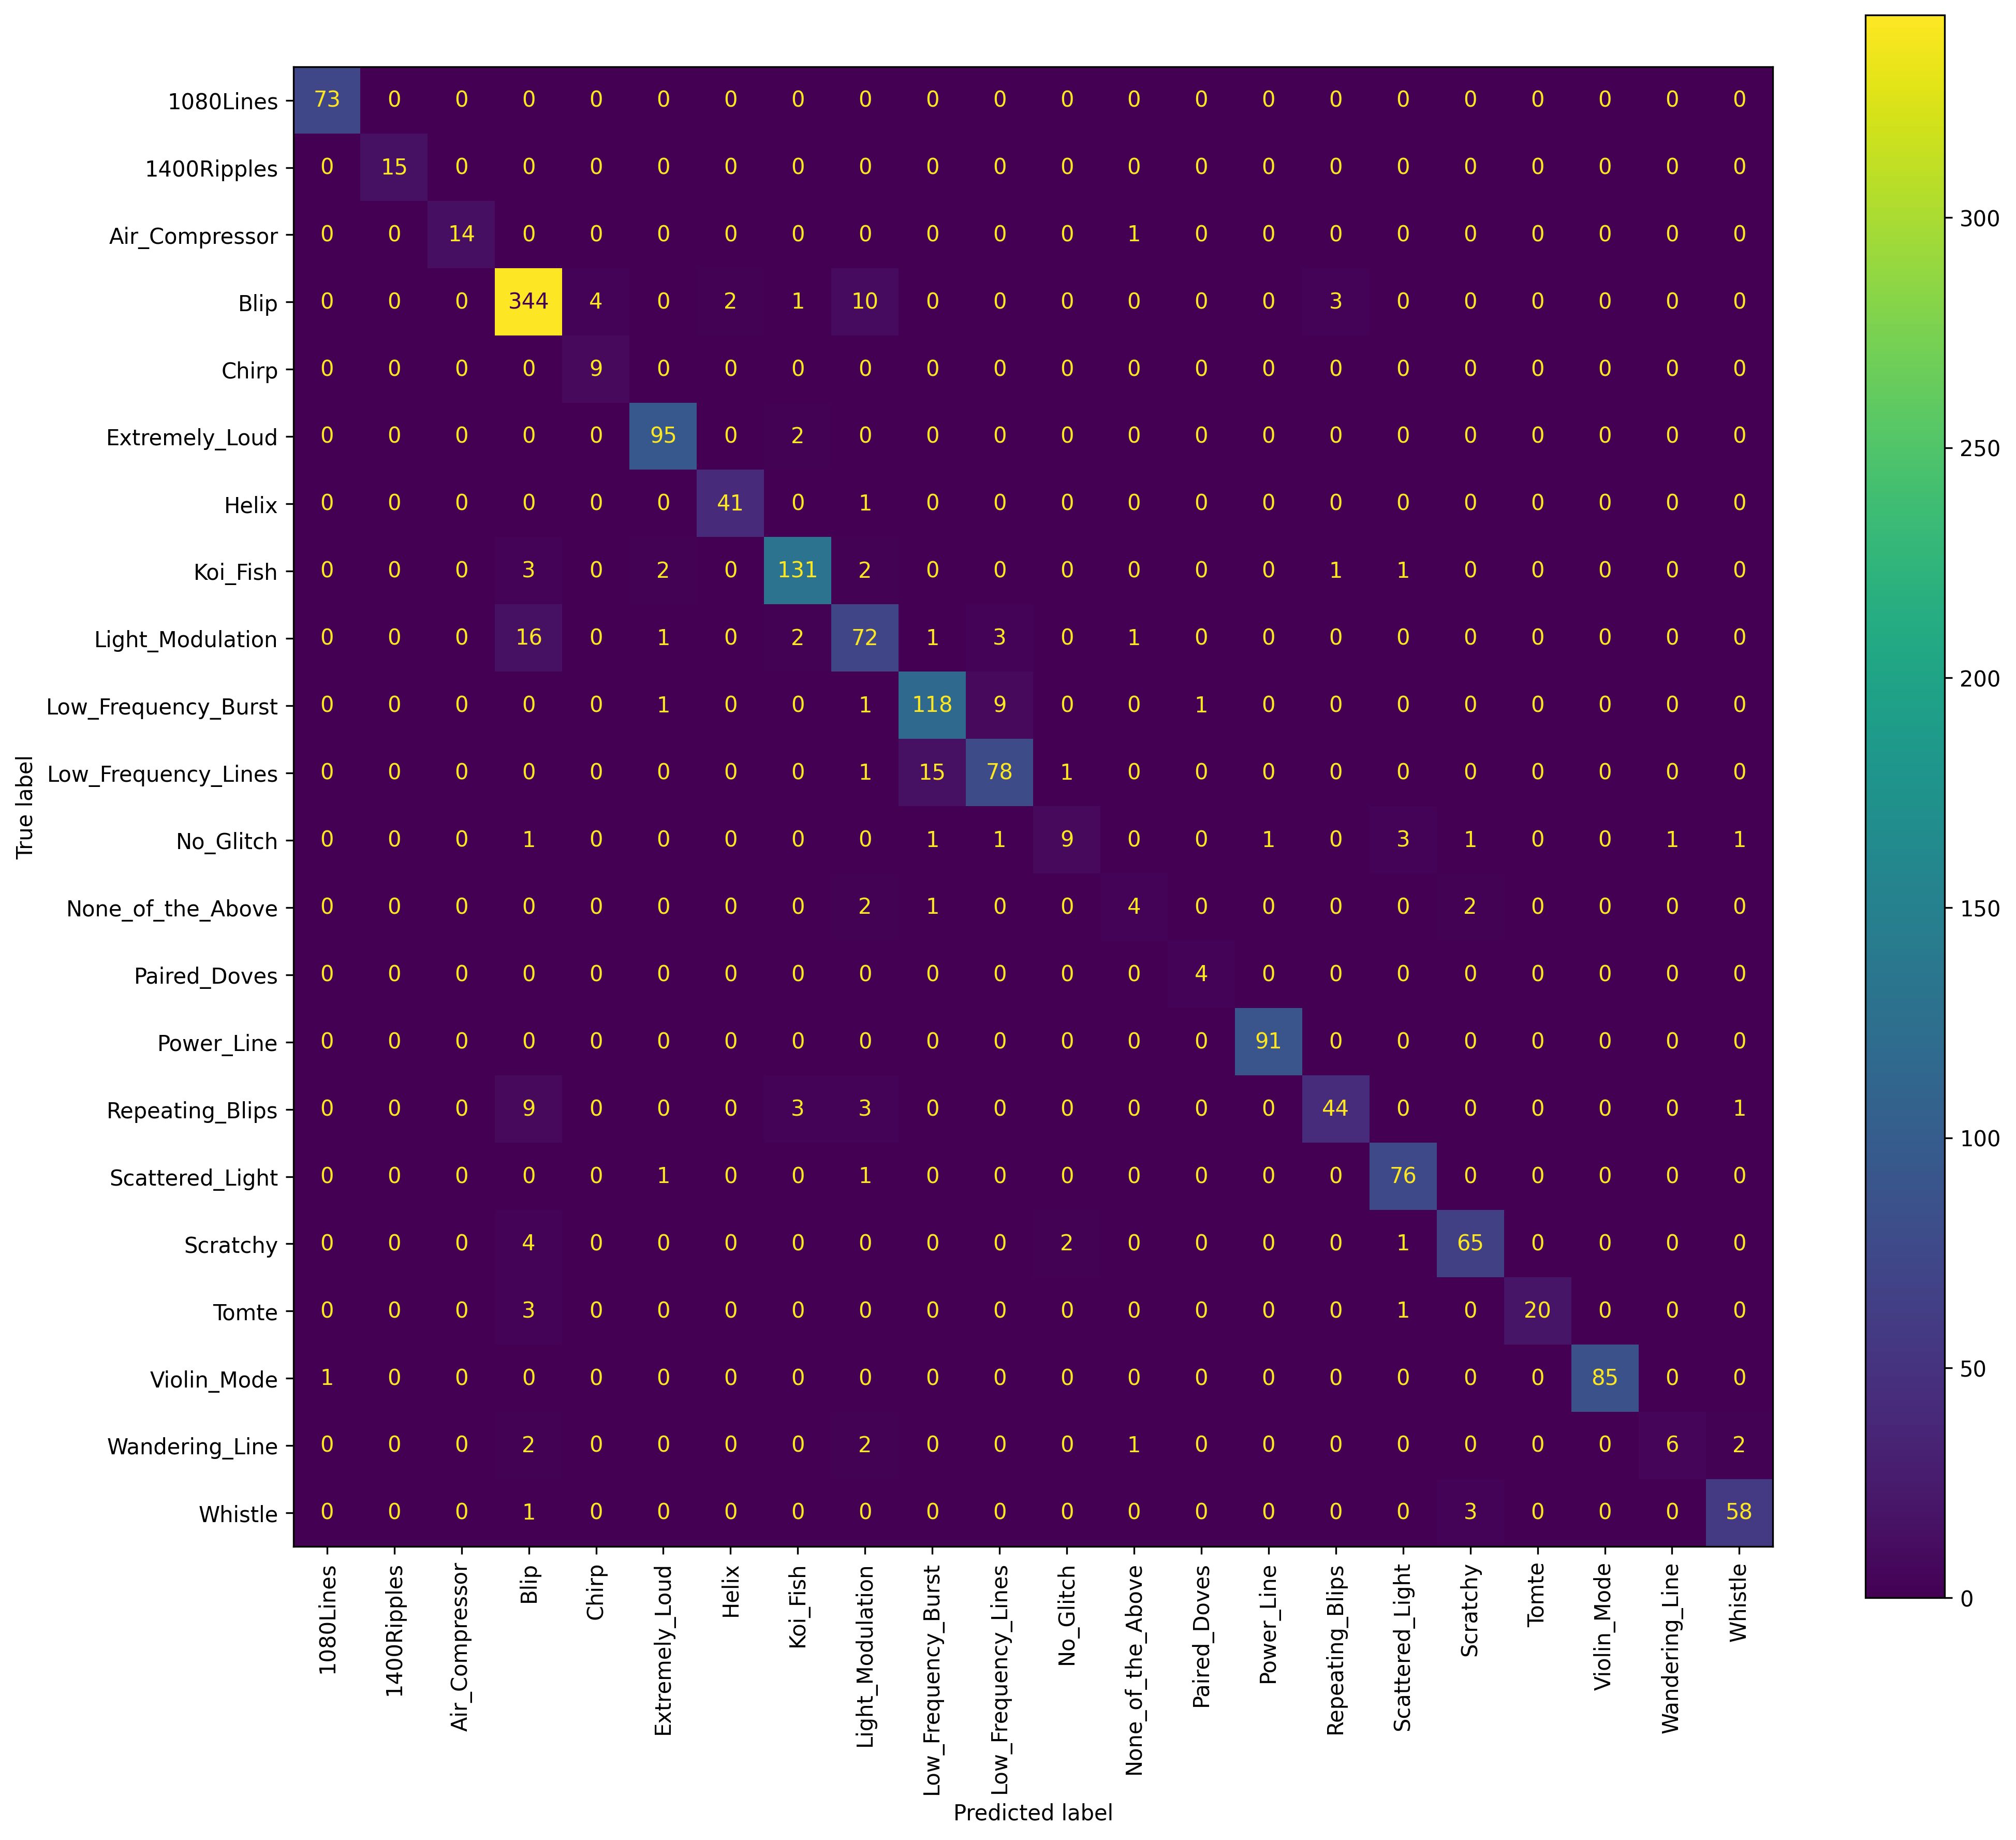

In [11]:

# MATRIZ DE CONFUSIÓN 
y_enco=encoder.fit_transform(df['label'])
#reasignación de valores a datos de tipo "string" a numerico
class_name=encoder.classes_ 
# guardar nombres para reportes/plots
cm=confusion_matrix(y_test,y_pred)
#creación de la matriz de confusión en base a las variables de predicción
# y testeo de las etiquetas (Se visualizán la cantidad de datos usado para la validación)
cmN=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
#normalización de los datos que se verán en la matriz

fig,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cmN,annot=True,fmt='.2f',cmap='viridis',xticklabels=class_name,yticklabels=class_name)
plt.tight_layout()
plt.show()
fig,ax=plt.subplots(figsize=(14,12))
vis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_name)
vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
plt.tight_layout()
plt.show()
# matriz de confusión, los datos en fila representan los datos reales que fueron clasificados como otros, y las columnas son los datos erroneos que 
#fueron predecidos como la etiqueta que se está mirando

In [13]:

# REPORTE DE CLASIFICACIÓN 
report=classification_report(y_test,y_pred,target_names=class_name,output_dict=True)
# Función que muestra el reporte de rendimiento de clasificación del modelo
# rescpecto a cada etiqueta de glitch 
reportdf=pd.DataFrame(report).transpose()
# Se crea el Data Frame para la creación de la tabla en formato Latex
reportdf_classes=reportdf.iloc[:,-3]
# Visualización de todas las columnas calculadas por classification_report()
Latex_t=reportdf.sort_values(by='f1-score',ascending=False).to_latex()
# Variable que contiene la visualización en formato latex
# de la tabla
#########print(reportdf.sort_values(by='f1-score',ascending=False))
print(reportdf)
# visualización de la tabla en orden ascendente, tomando como referencia 
# el promedio armonico f1-score


                     precision    recall  f1-score      support
1080Lines             0.986486  1.000000  0.993197    73.000000
1400Ripples           1.000000  1.000000  1.000000    15.000000
Air_Compressor        1.000000  0.933333  0.965517    15.000000
Blip                  0.898172  0.945055  0.921017   364.000000
Chirp                 0.692308  1.000000  0.818182     9.000000
Extremely_Loud        0.950000  0.979381  0.964467    97.000000
Helix                 0.953488  0.976190  0.964706    42.000000
Koi_Fish              0.942446  0.935714  0.939068   140.000000
Light_Modulation      0.757895  0.750000  0.753927    96.000000
Low_Frequency_Burst   0.867647  0.907692  0.887218   130.000000
Low_Frequency_Lines   0.857143  0.821053  0.838710    95.000000
No_Glitch             0.750000  0.473684  0.580645    19.000000
None_of_the_Above     0.571429  0.444444  0.500000     9.000000
Paired_Doves          0.800000  1.000000  0.888889     4.000000
Power_Line            0.989130  1.000000

In [ ]:
# descripción de la tabla de reporte de clasificación
# muestra el valor medio, desviación estandar, minimo, maximo,etc.
# del reporte de clasificación del modelo
reportdf.describe()

precision     recall   f1-score      support
count  25.000000  25.000000  25.000000    25.000000
mean    0.891143   0.867241   0.872467   191.316437
std     0.106453   0.170589   0.133624   428.489856
min     0.571429   0.444444   0.500000     0.910916
25%     0.857143   0.833333   0.838710    15.000000
50%     0.915493   0.933333   0.909091    72.000000
75%     0.953488   0.979381   0.964467    96.000000
max     1.000000   1.000000   1.000000  1594.000000

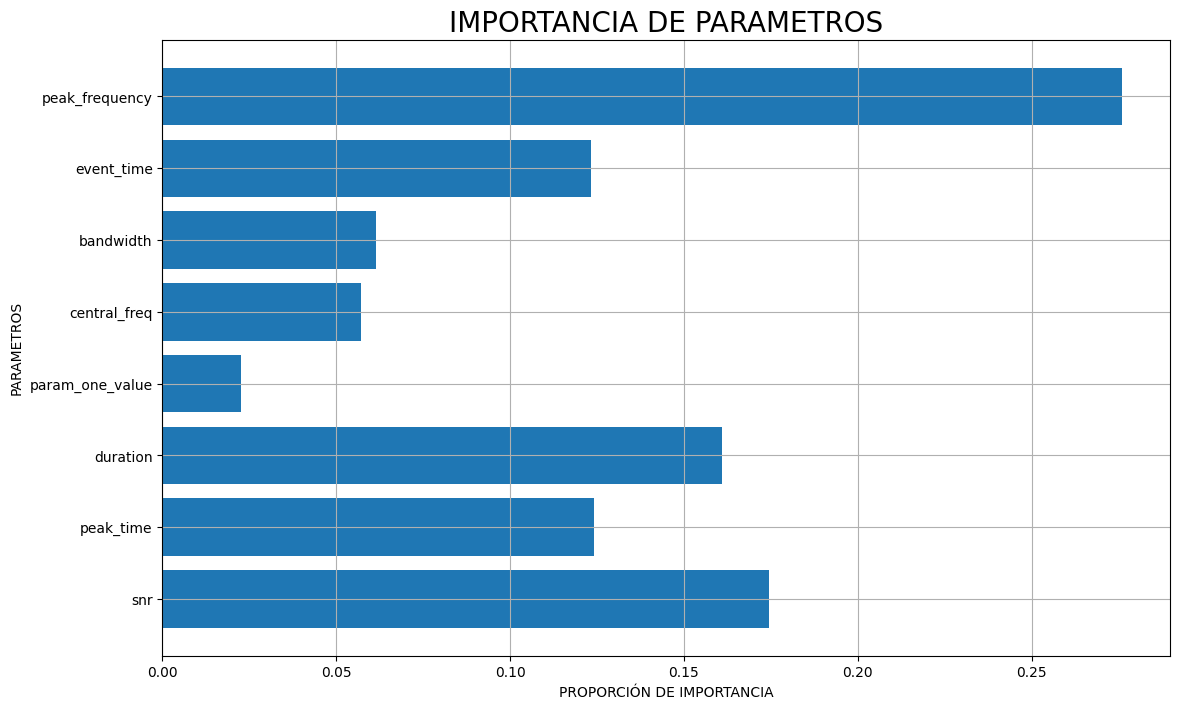

In [ ]:
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
plt.figure(figsize=(13, 8))
xcolum=x.columns
caract=xcolum.shape[0]
#Cantidad de columnas 
plt.barh(range(caract), model.feature_importances_)
#Aplicación de la función que mide la importancia y aporte de cada parametro
#según los resultados y entrenamiento del modelo
plt.yticks(np.arange(caract), xcolum)
plt.grid()
plt.xlabel('PROPORCIÓN DE IMPORTANCIA')
plt.ylabel('PARAMETROS')
plt.title('IMPORTANCIA DE PARAMETROS', fontsize=20)
plt.show()

# CLASIFICADOR POR REDES NEURONALES 


In [14]:
X=df1[['peak_time','duration','param_one_value','central_freq','bandwidth','event_time','peak_frequency']] 
# features" o "variables explicativas. Datos introducidos demas "peak_time_ns,start_time,start_time_ns"
Y=df1['label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
Y_train_int=encoder.fit_transform(Y_train)
Y_test_int=encoder.transform(Y_test)
classname=encoder.classes_
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
# Parte de los procesos hechos hasta ahora, son muy similares a los hechos en Random Forest
# Por ello no hace falta explicar nuevamente los mismo paso hechos con antelación en el caso
#anterior
smote=SMOTE(sampling_strategy='auto',random_state=42)
# SMOTE() es una función que interpolariza las clases que tenga menor cantidad de datos
# para generar datos artificiales de las clases y compensar el desequilibrio de
# #información 
X_train_smot,Y_train_smot=smote.fit_resample(X_train_scaled,Y_train_int)
#aplicación de SMOTE() a las variables de entrenamiento
numclass=len(classname)
Y_train_oneH=to_categorical(Y_train_smot, num_classes=numclass) 
Y_test_oneH= to_categorical(Y_test_int, num_classes=numclass)
#convertir las etiquetas de clase en vectores one-hot encoding

modelo=Sequential()
# A partir de estas lineas de codigo, se empieza la arquitectura del modelo
# donde se adiciona las capas y cantidad de neuronas que esta poseerá , el numero
# de caracteristicas que tendra cada muestra de entrada "input_dim", la función de 
# activación "relu" ermite que la red aprenda relaciones no-lineales de manera eficiente
modelo.add(Dense(1024, input_dim=X_train.shape[1],activation='relu')) 
modelo.add(BatchNormalization())  
# Normaliza activaciones, estabiliza y mejora el entrenamiento de las redes neuronales
modelo.add(Dropout(0.2)) 
modelo.add(Dense(512, input_dim=X_train.shape[1],activation='relu')) 
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))  # Desactiva 20% de las neuronas
modelo.add(Dense(256, activation='relu'))
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(128, activation='relu'))
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(32, activation='relu'))
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(22, activation='softmax'))  
# softmax es una función de activación que permite la salida de mas de 2 clases

# COMPILACIÓN DEL MODELO 

opti=Adam(learning_rate=0.0005)
modelo.compile(optimizer=opti, loss=CategoricalFocalCrossentropy, metrics=['accuracy'])

c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
print("Distribución original (train):")
print(pd.Series(Y_train_int).value_counts().sort_index())

Distribución original (train):
0      262
1       65
2       46
3     1457
4       48
5      358
6      223
7      565
8      409
9      497
10     357
11     120
12      65
13      22
14     359
15     210
16     354
17     270
18      82
19     330
20      34
21     239
Name: count, dtype: int64


ExactExplainer explainer: 1595it [03:12,  8.21it/s]                          


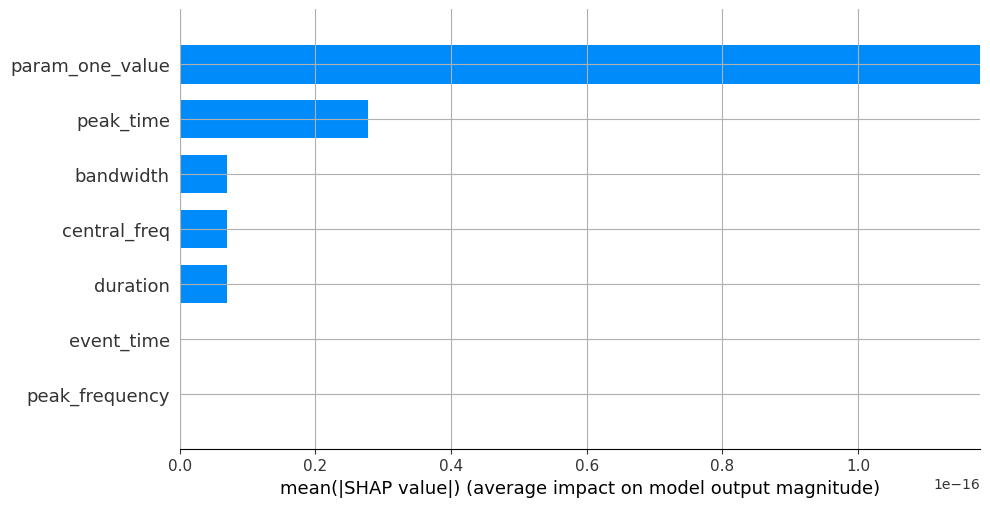

In [18]:
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
explainer = shap.Explainer(modelo, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=False, plot_size=(10,6))
plt.legend([],[],frameon=False)
plt.grid()
plt.show()


 # ENTRENAMIENTO DEL MODELO 

RECORDAR HACER CNN Y METER EPOCHS 


In [24]:
print(Y_train_under.shape)

(5715, 22)


In [16]:
# ejecució e historial de aprendizaje del modelo
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
# Early stopping detiene la compilación del modelo al no haber progresos despues de 30 epocas
PeClas=class_weight.compute_sample_weight('balanced',y=Y_train)
# class_weight maneja el desbalanceo de clases de forma individual
# durante el entrenamiento
PeClass={i: max(1.0, PeClas[i]*1.2) for i in range(len(PeClas))} 
# Diccionario que recorre cada clase de PeClas y aumenta su importancia o peso 
# en un 20%, donde el valor minimo permitido es 1.0
history=modelo.fit(X_train_smot,Y_train_oneH, epochs=150, batch_size=256, validation_data=(X_test_scaled, Y_test_oneH), callbacks=[early_stop],class_weight=PeClass)
# ejecución dl modelo con 150 epocas (ciclo completo de aprendizaje de toda la red 
# neuronal usando toda la muestra en dispocisión), Es el número de muestras de 
# entrenamiento que se procesan antes de actualizar los pesos de la red neuronal

Epoch 1/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1636 - loss: 1.0582 - val_accuracy: 0.0508 - val_loss: 0.6687
Epoch 2/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3217 - loss: 0.5957 - val_accuracy: 0.1280 - val_loss: 0.5854
Epoch 3/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4011 - loss: 0.4556 - val_accuracy: 0.2578 - val_loss: 0.4650
Epoch 4/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4398 - loss: 0.3892 - val_accuracy: 0.3149 - val_loss: 0.3914
Epoch 5/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4714 - loss: 0.3495 - val_accuracy: 0.3545 - val_loss: 0.3572
Epoch 6/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4945 - loss: 0.3183 - val_accuracy: 0.3927 - val_loss: 0.3079
Epoch 7/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5124 - loss: 0.2969 - val_accuracy: 0.4360 - val_loss: 0.2803
Epoch 8/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5221 - loss: 0.2793 - 

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


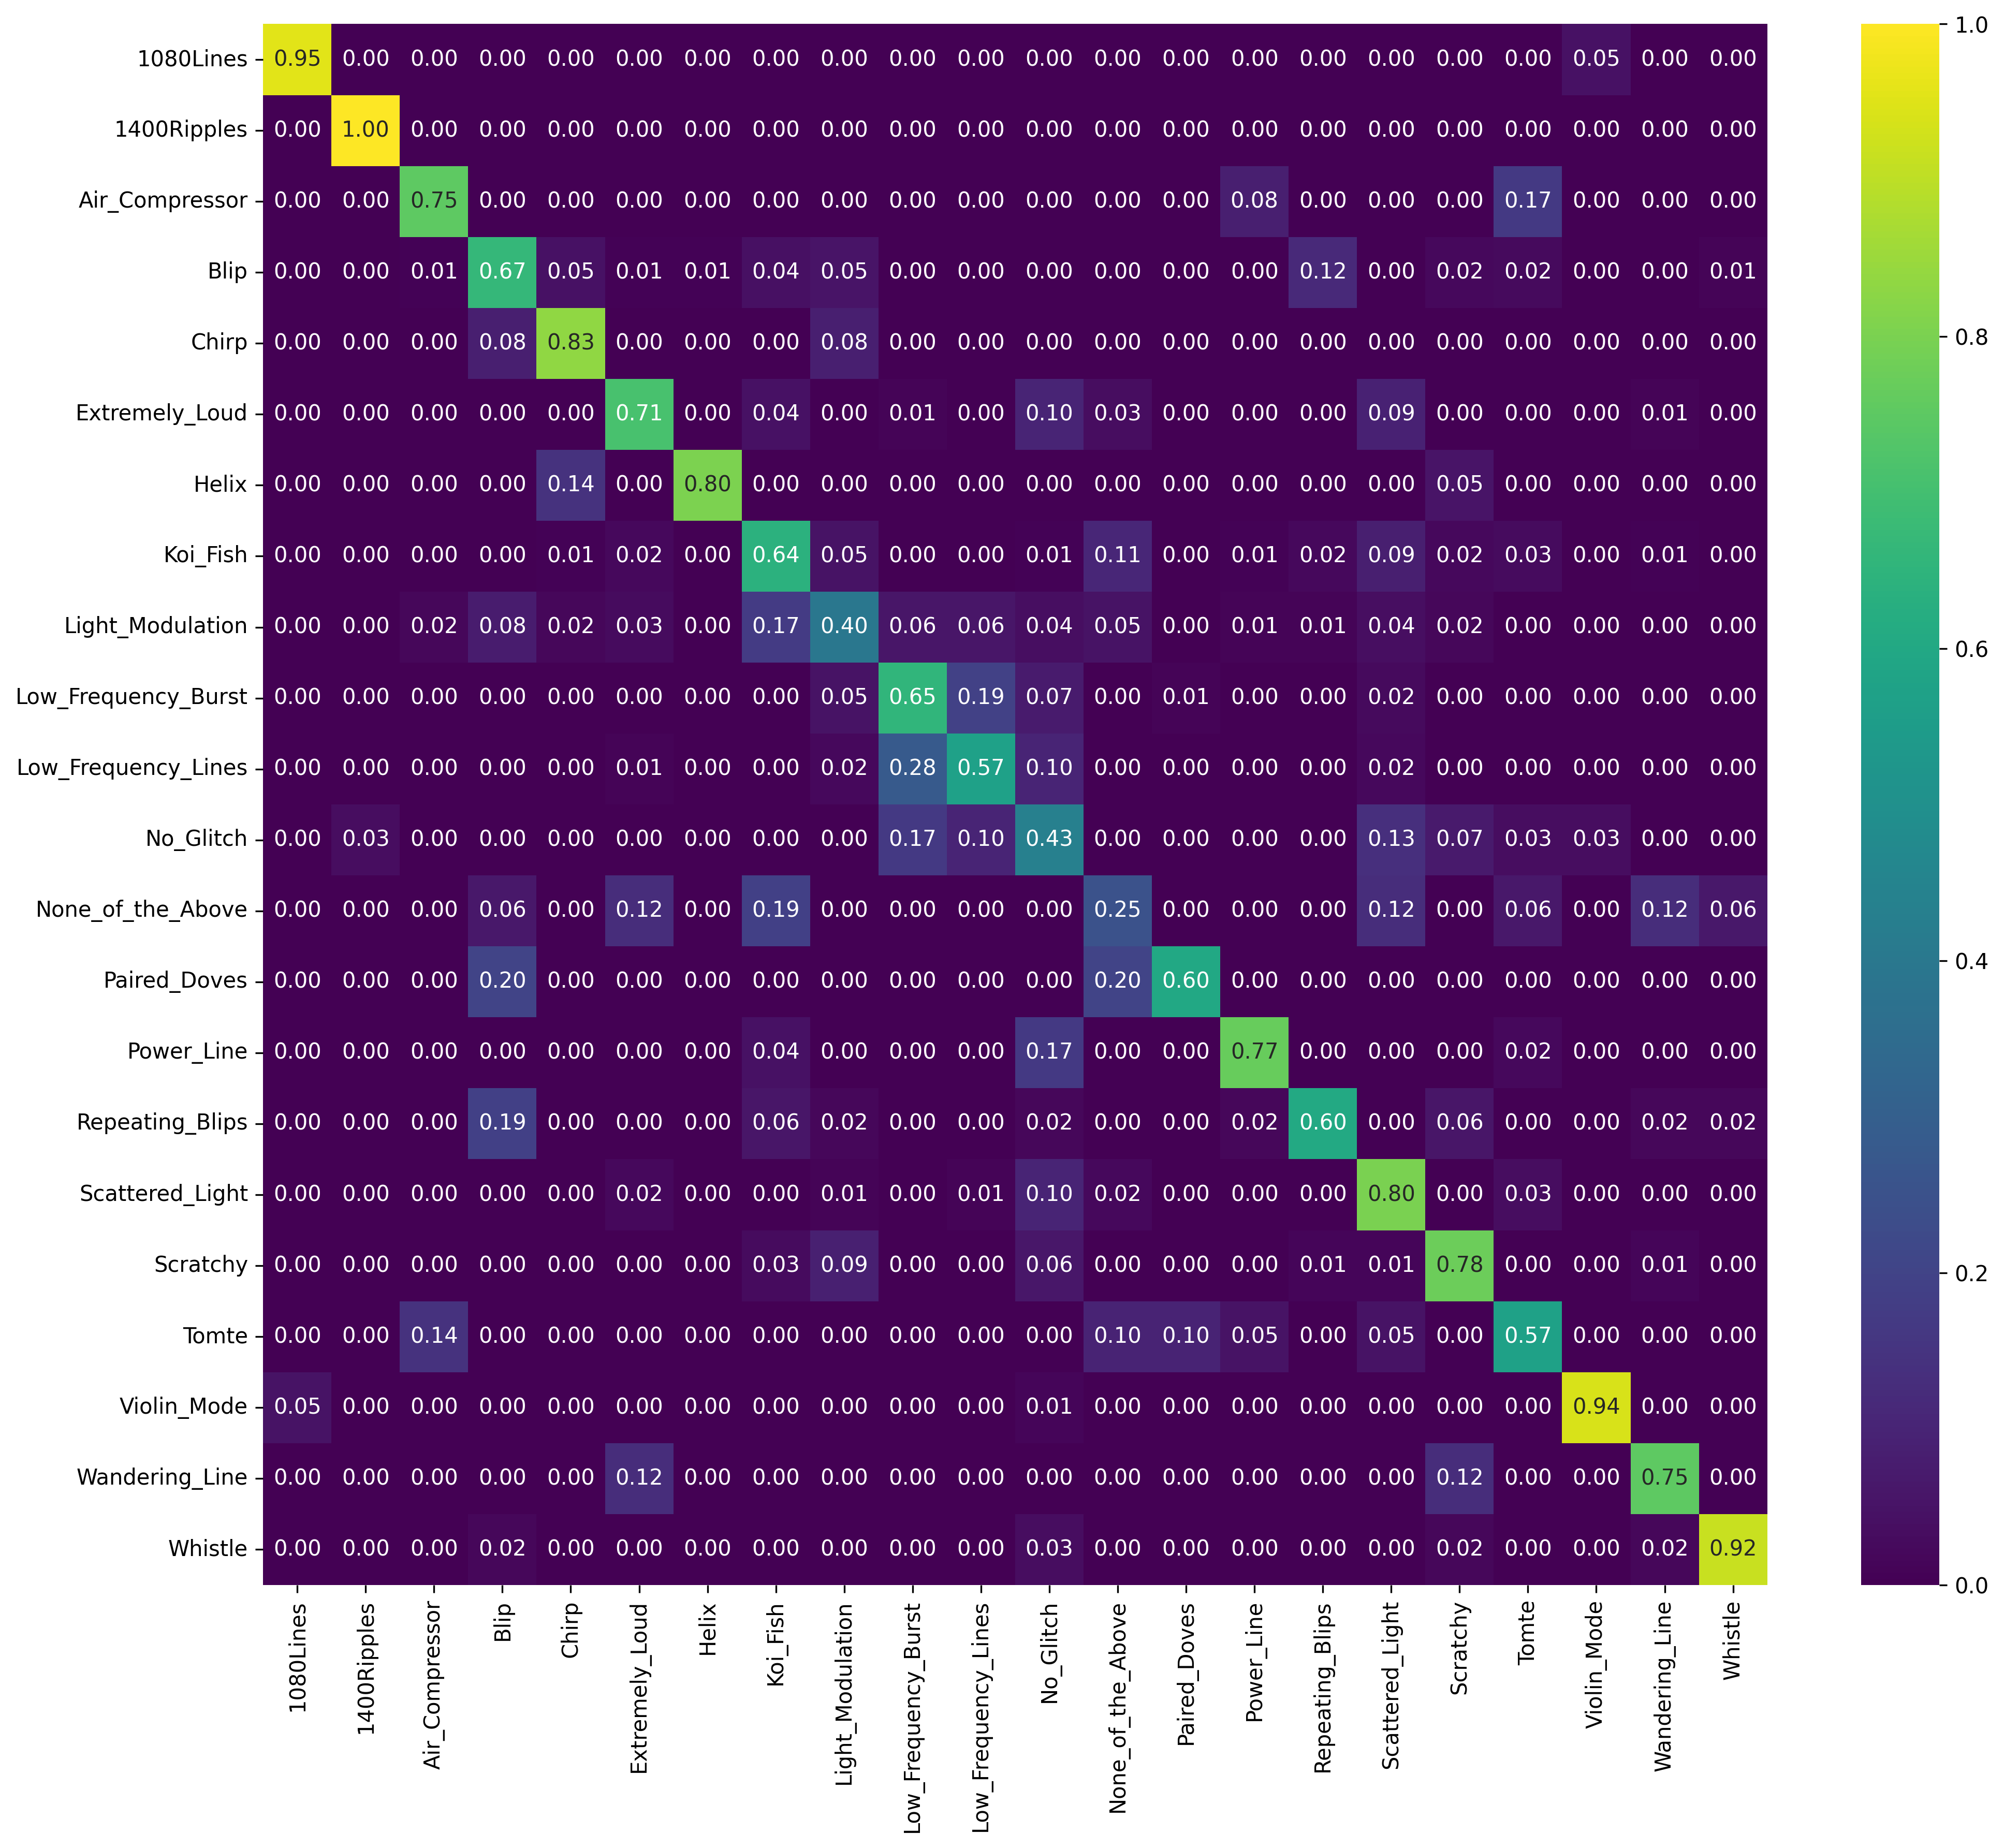

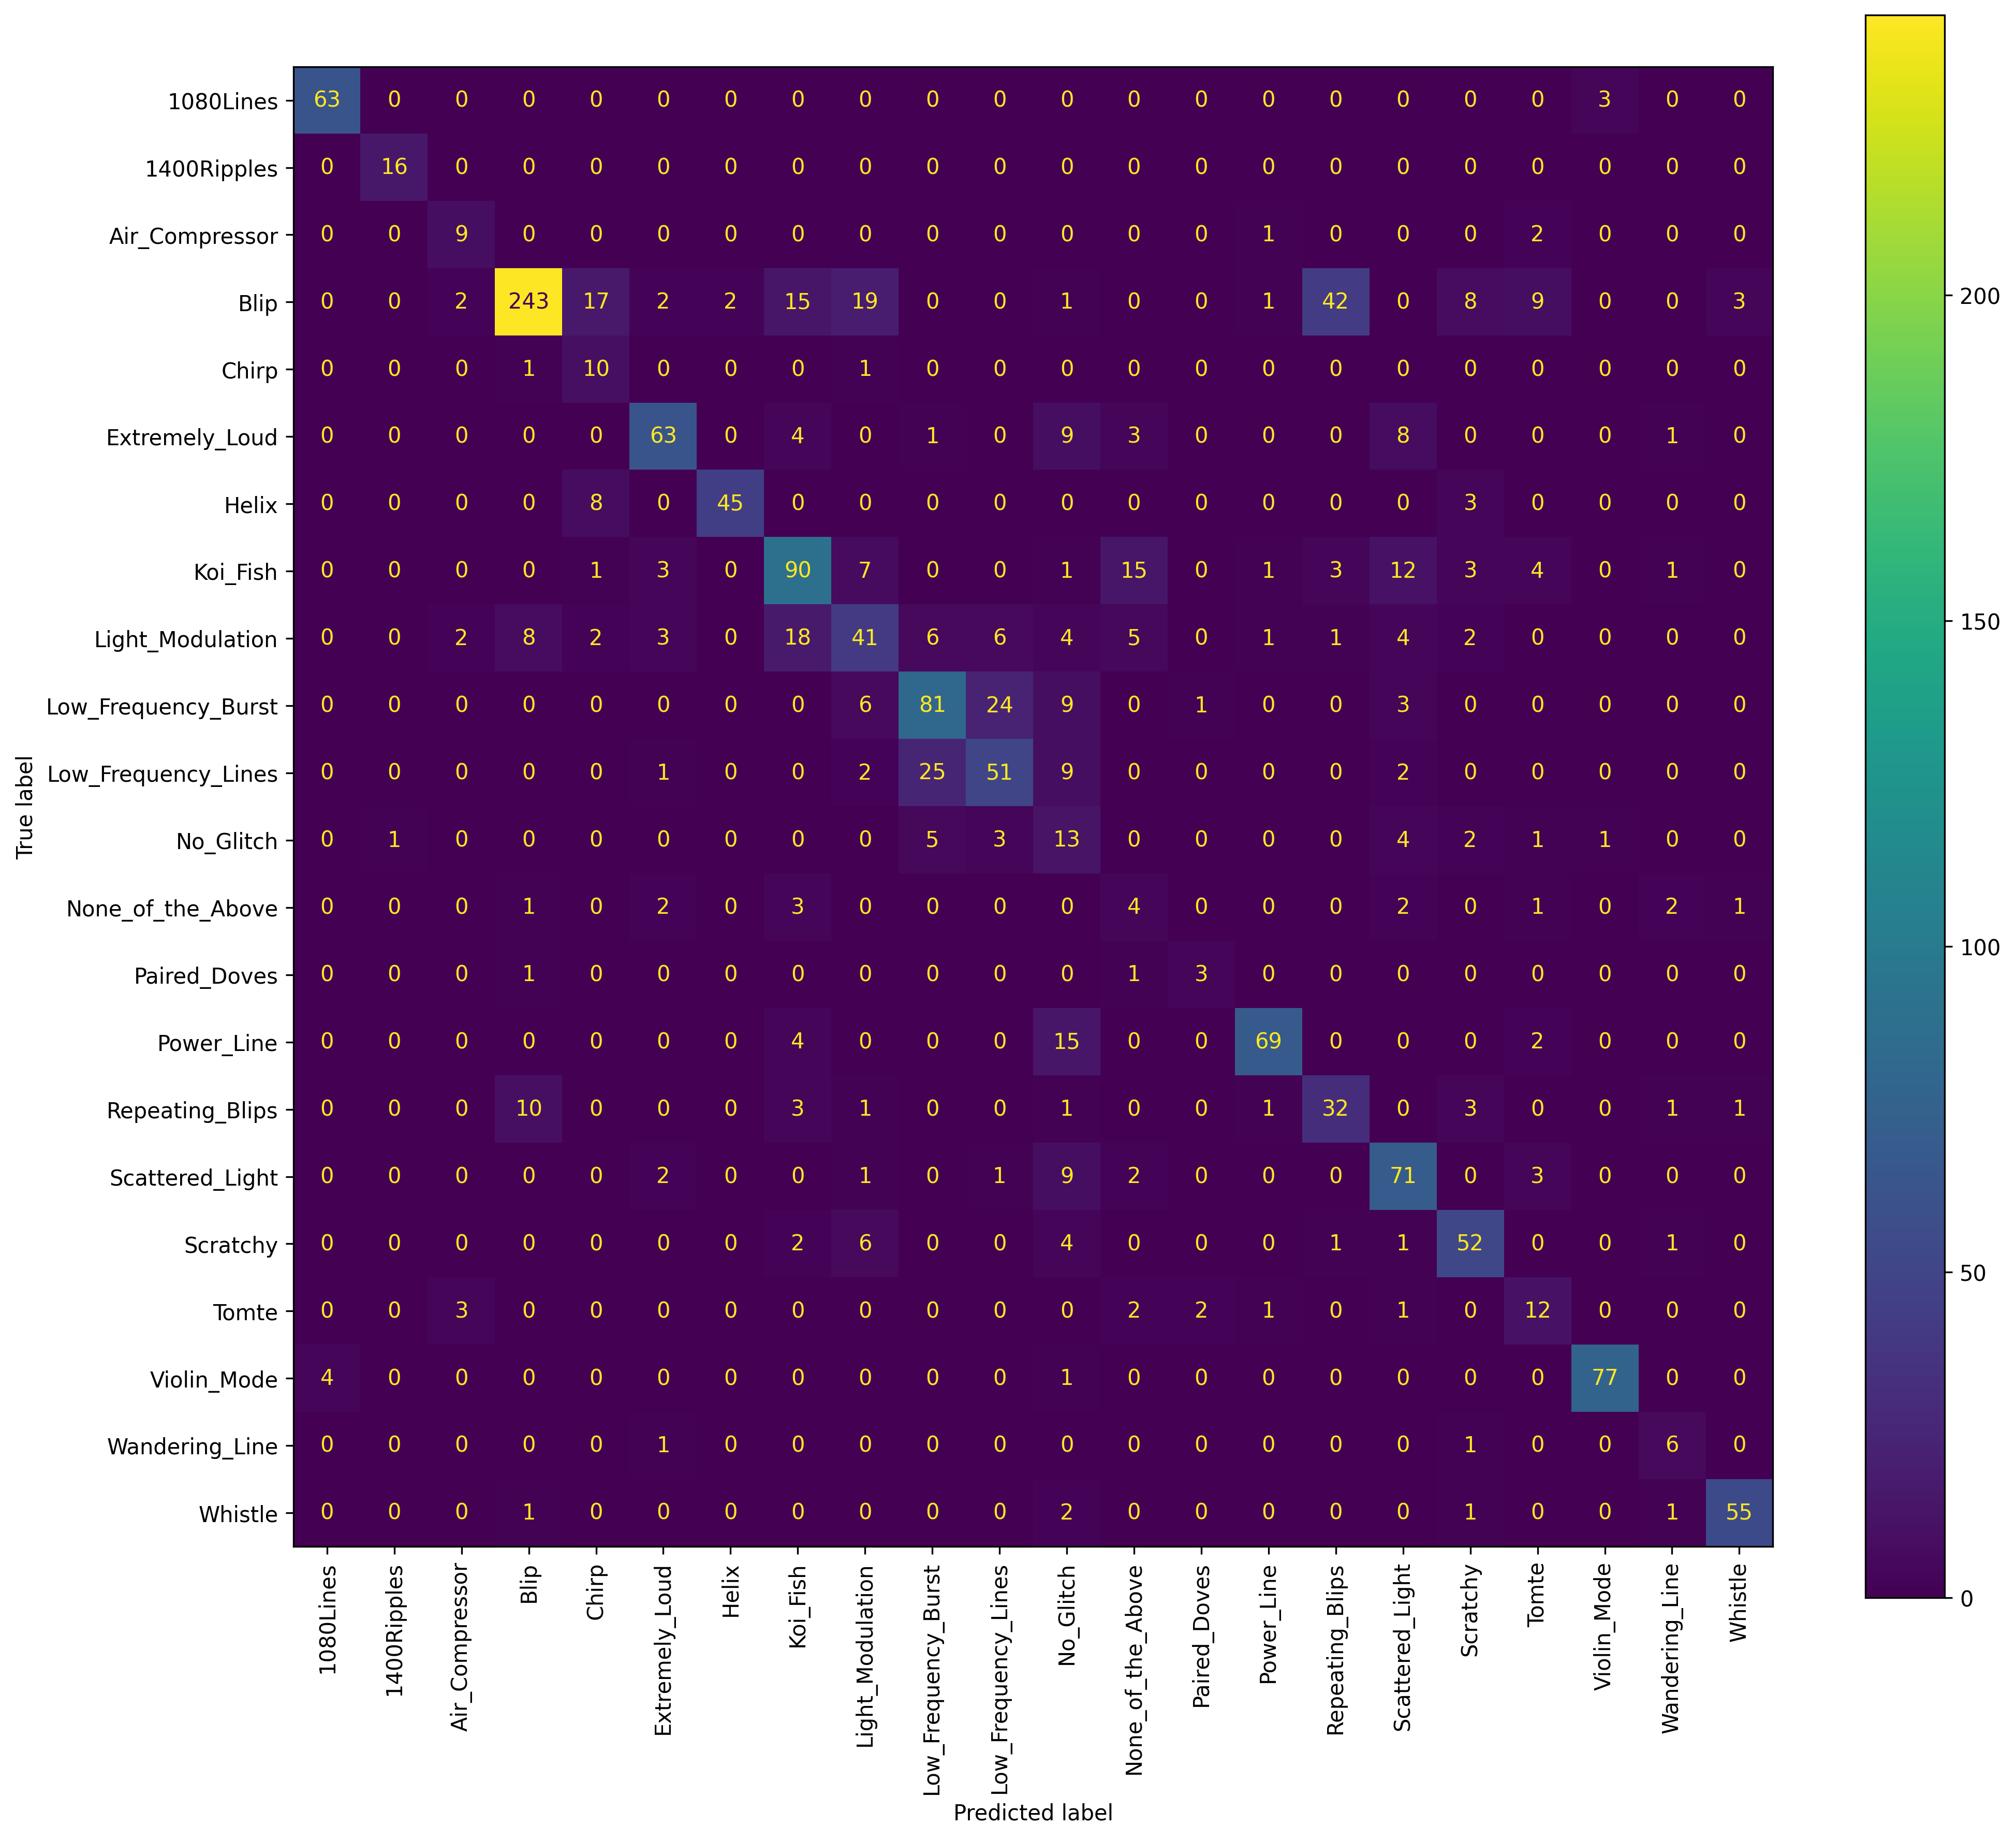

In [17]:
# MATRIZ DE CONFUSIÓN RED NEURONAL DENSA 

Y_pred=modelo.predict(X_test_scaled)
Y_predar=np.argmax(Y_pred,axis=1)
cmRND=confusion_matrix(Y_test_int,Y_predar)
cmNRND=cmRND.astype('float')/cmRND.sum(axis=1)[:, np.newaxis]
fig,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cmNRND,annot=True,fmt='.2f',cmap='viridis',xticklabels=class_name,yticklabels=class_name)
plt.tight_layout()
plt.show()
fig,ax=plt.subplots(figsize=(14,12))
vis=ConfusionMatrixDisplay(confusion_matrix=cmRND,display_labels=class_name)
vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
plt.tight_layout()
plt.show()

In [ ]:
# CURVA DE ENTRENAMIERNO


def plot_training_curves(history, metrics):

    if isinstance(history, dict):
        history_dict = history
    else:
        history_dict = history.history

    plt.figure(figsize=(12, 5))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i + 1)
        plt.plot(history_dict[metric], label=f'Training {metric}')
        plt.plot(history_dict[f'val_{metric}'], label=f'Validation {metric}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.title(f'Training and Validation {metric.capitalize()}')
        plt.grid()
        plt.legend()
    
    plt.tight_layout()
    plt.show()

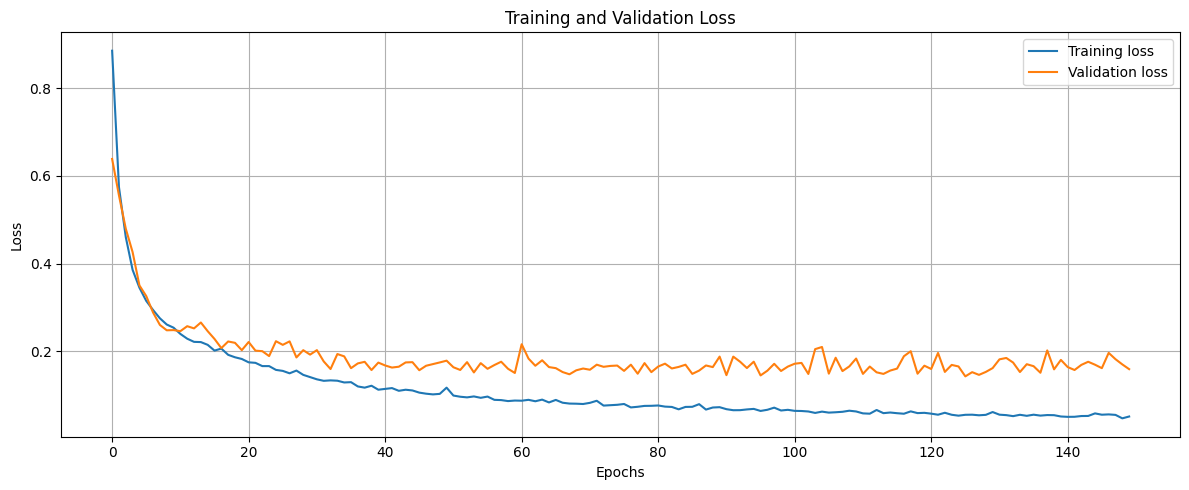

In [13]:
plot_training_curves(history,['loss'])


RELACION PROPORCIONAL ENTRE CANTIDAD DE CAPAS DEMÁS Y EL VALOR EN AUMENTO DEL batch_size

In [19]:

# REPORTE DE CLASIFICACIÓN 
reportRD=classification_report(Y_test,Y_predar,target_names=class_name,output_dict=True)
reportdfRD=pd.DataFrame(reportRD).transpose()
reportdf_classesRD=reportdfRD.iloc[:,-3]
Latex_RD=reportdfRD.sort_values(by='f1-score',ascending=False).to_latex()
########print(reportdfRD.sort_values(by='f1-score',ascending=False))
print(reportdfRD)

                     precision    recall  f1-score      support
1080Lines             0.940299  0.954545  0.947368    66.000000
1400Ripples           0.941176  1.000000  0.969697    16.000000
Air_Compressor        0.562500  0.750000  0.642857    12.000000
Blip                  0.916981  0.667582  0.772655   364.000000
Chirp                 0.263158  0.833333  0.400000    12.000000
Extremely_Loud        0.818182  0.707865  0.759036    89.000000
Helix                 0.957447  0.803571  0.873786    56.000000
Koi_Fish              0.647482  0.638298  0.642857   141.000000
Light_Modulation      0.488095  0.398058  0.438503   103.000000
Low_Frequency_Burst   0.686441  0.653226  0.669421   124.000000
Low_Frequency_Lines   0.600000  0.566667  0.582857    90.000000
No_Glitch             0.166667  0.433333  0.240741    30.000000
None_of_the_Above     0.125000  0.250000  0.166667    16.000000
Paired_Doves          0.500000  0.600000  0.545455     5.000000
Power_Line            0.920000  0.766667

In [18]:
reportdfRD.describe()

precision     recall   f1-score      support
count  25.000000  25.000000  25.000000    25.000000
mean    0.643852   0.701478   0.651520   191.307528
std     0.260398   0.180268   0.217717   428.391187
min     0.142857   0.250000   0.181818     0.688206
25%     0.428571   0.620968   0.500000    16.000000
50%     0.678832   0.702632   0.688206    66.000000
75%     0.888489   0.776119   0.782609    90.000000
max     1.000000   1.000000   1.000000  1594.000000

# XGBOOST


# .....VALIDACIÓN DE HIPERPARAMETROS
BUSCAR MAS DATOS, MAS INFORMACIÓN Y HACER LA VALIDACIÓN DE HIPER PARA HAYAR LA MEJOR COMBINACIÓN

BUSCAR MAS MODELOS AVANZADOS DE REDES AVANZADAS
BUSCAR ARQUITECTURA TRANSFORMER (ADAPTAR A MI CASO) - CON UNA RED PRE-ENTRENADA

c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:56:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Precisión del modelo: 0.9084
Train Accuracy: 99.61%


c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:56:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:56:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:57:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:57:02] WARNING: C:\actions-runner\_work\xg

Cross-Validation Accuracy: 0.9074


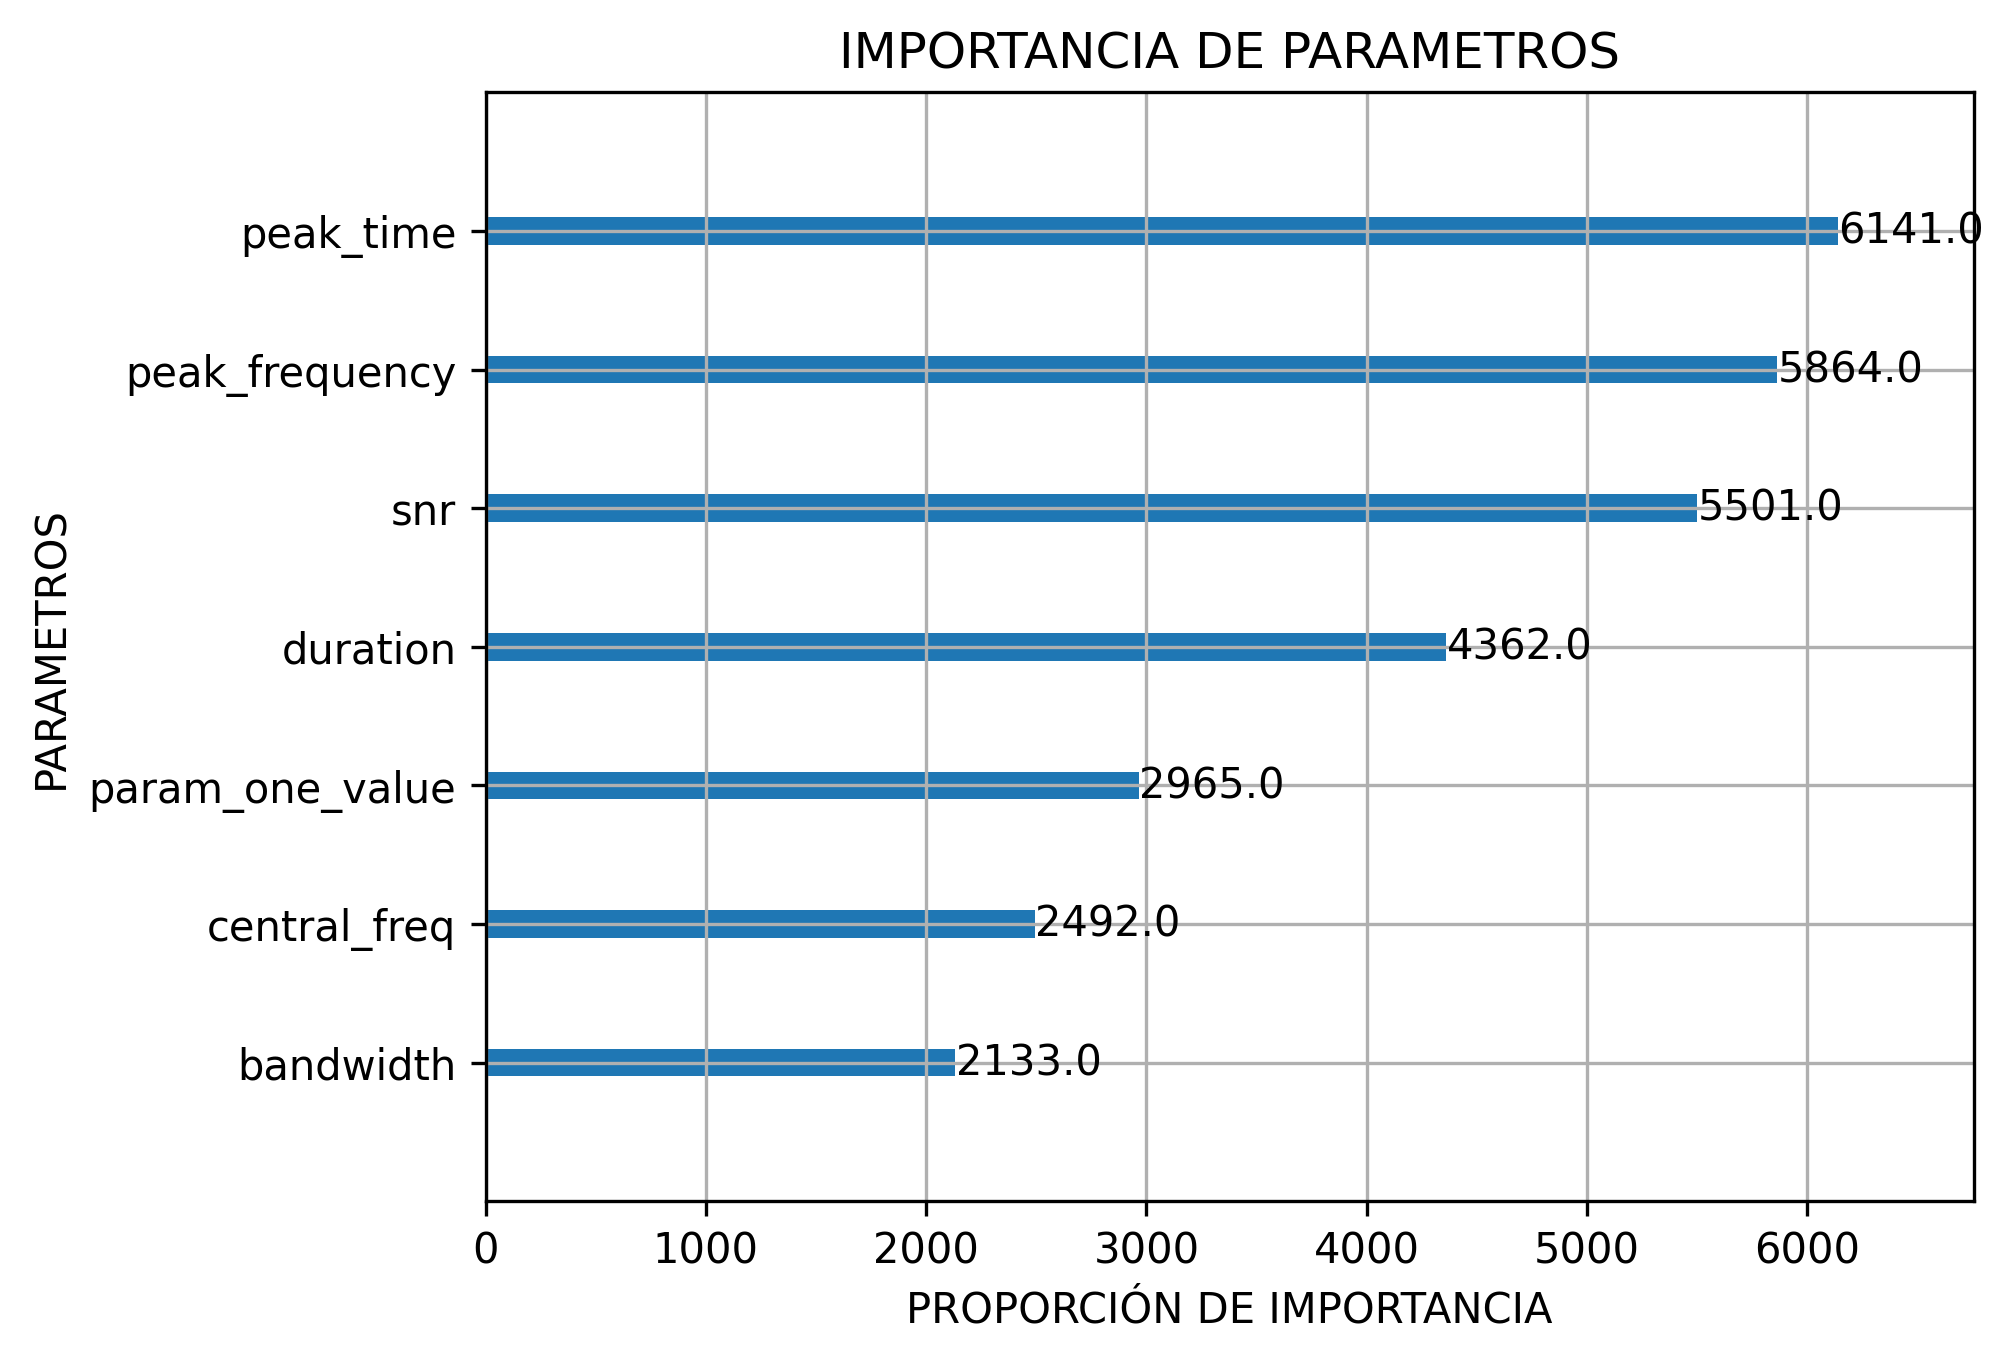

In [20]:
xx=df1[['snr','peak_time','duration','param_one_value','central_freq','bandwidth','peak_frequency']] 
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,y,test_size=0.2,random_state=42)
Clasificador=XGBClassifier(n_stimators=100,max_depth=6,learning_rate=0.123)
# max_depht es un hiperparametro que define la profundidad del arbol (algo así como capas)
# learning_rate es el factor de escalado que determina la contribución 
# de cada nuevo arbol, el valor de "0.123" es el más estable y optimo
Clasificador.fit(xx_train,yy_train)
y_predec=Clasificador.predict(xx_test)
print(f"Precisión del modelo: {accuracy_score(yy_test, y_predec):.4f}")
y_pred_trainn = Clasificador.predict(xx_train)
accuracy = sum(y_pred_trainn == yy_train) / len(y_pred_trainn)
print(f"Train Accuracy: {100 * accuracy:.2f}%")
scores = cross_val_score(Clasificador, xx, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
plot_importance(Clasificador, importance_type="weight")
plt.title('IMPORTANCIA DE PARAMETROS')
plt.xlabel('PROPORCIÓN DE IMPORTANCIA')
plt.ylabel('PARAMETROS')
plt.show()

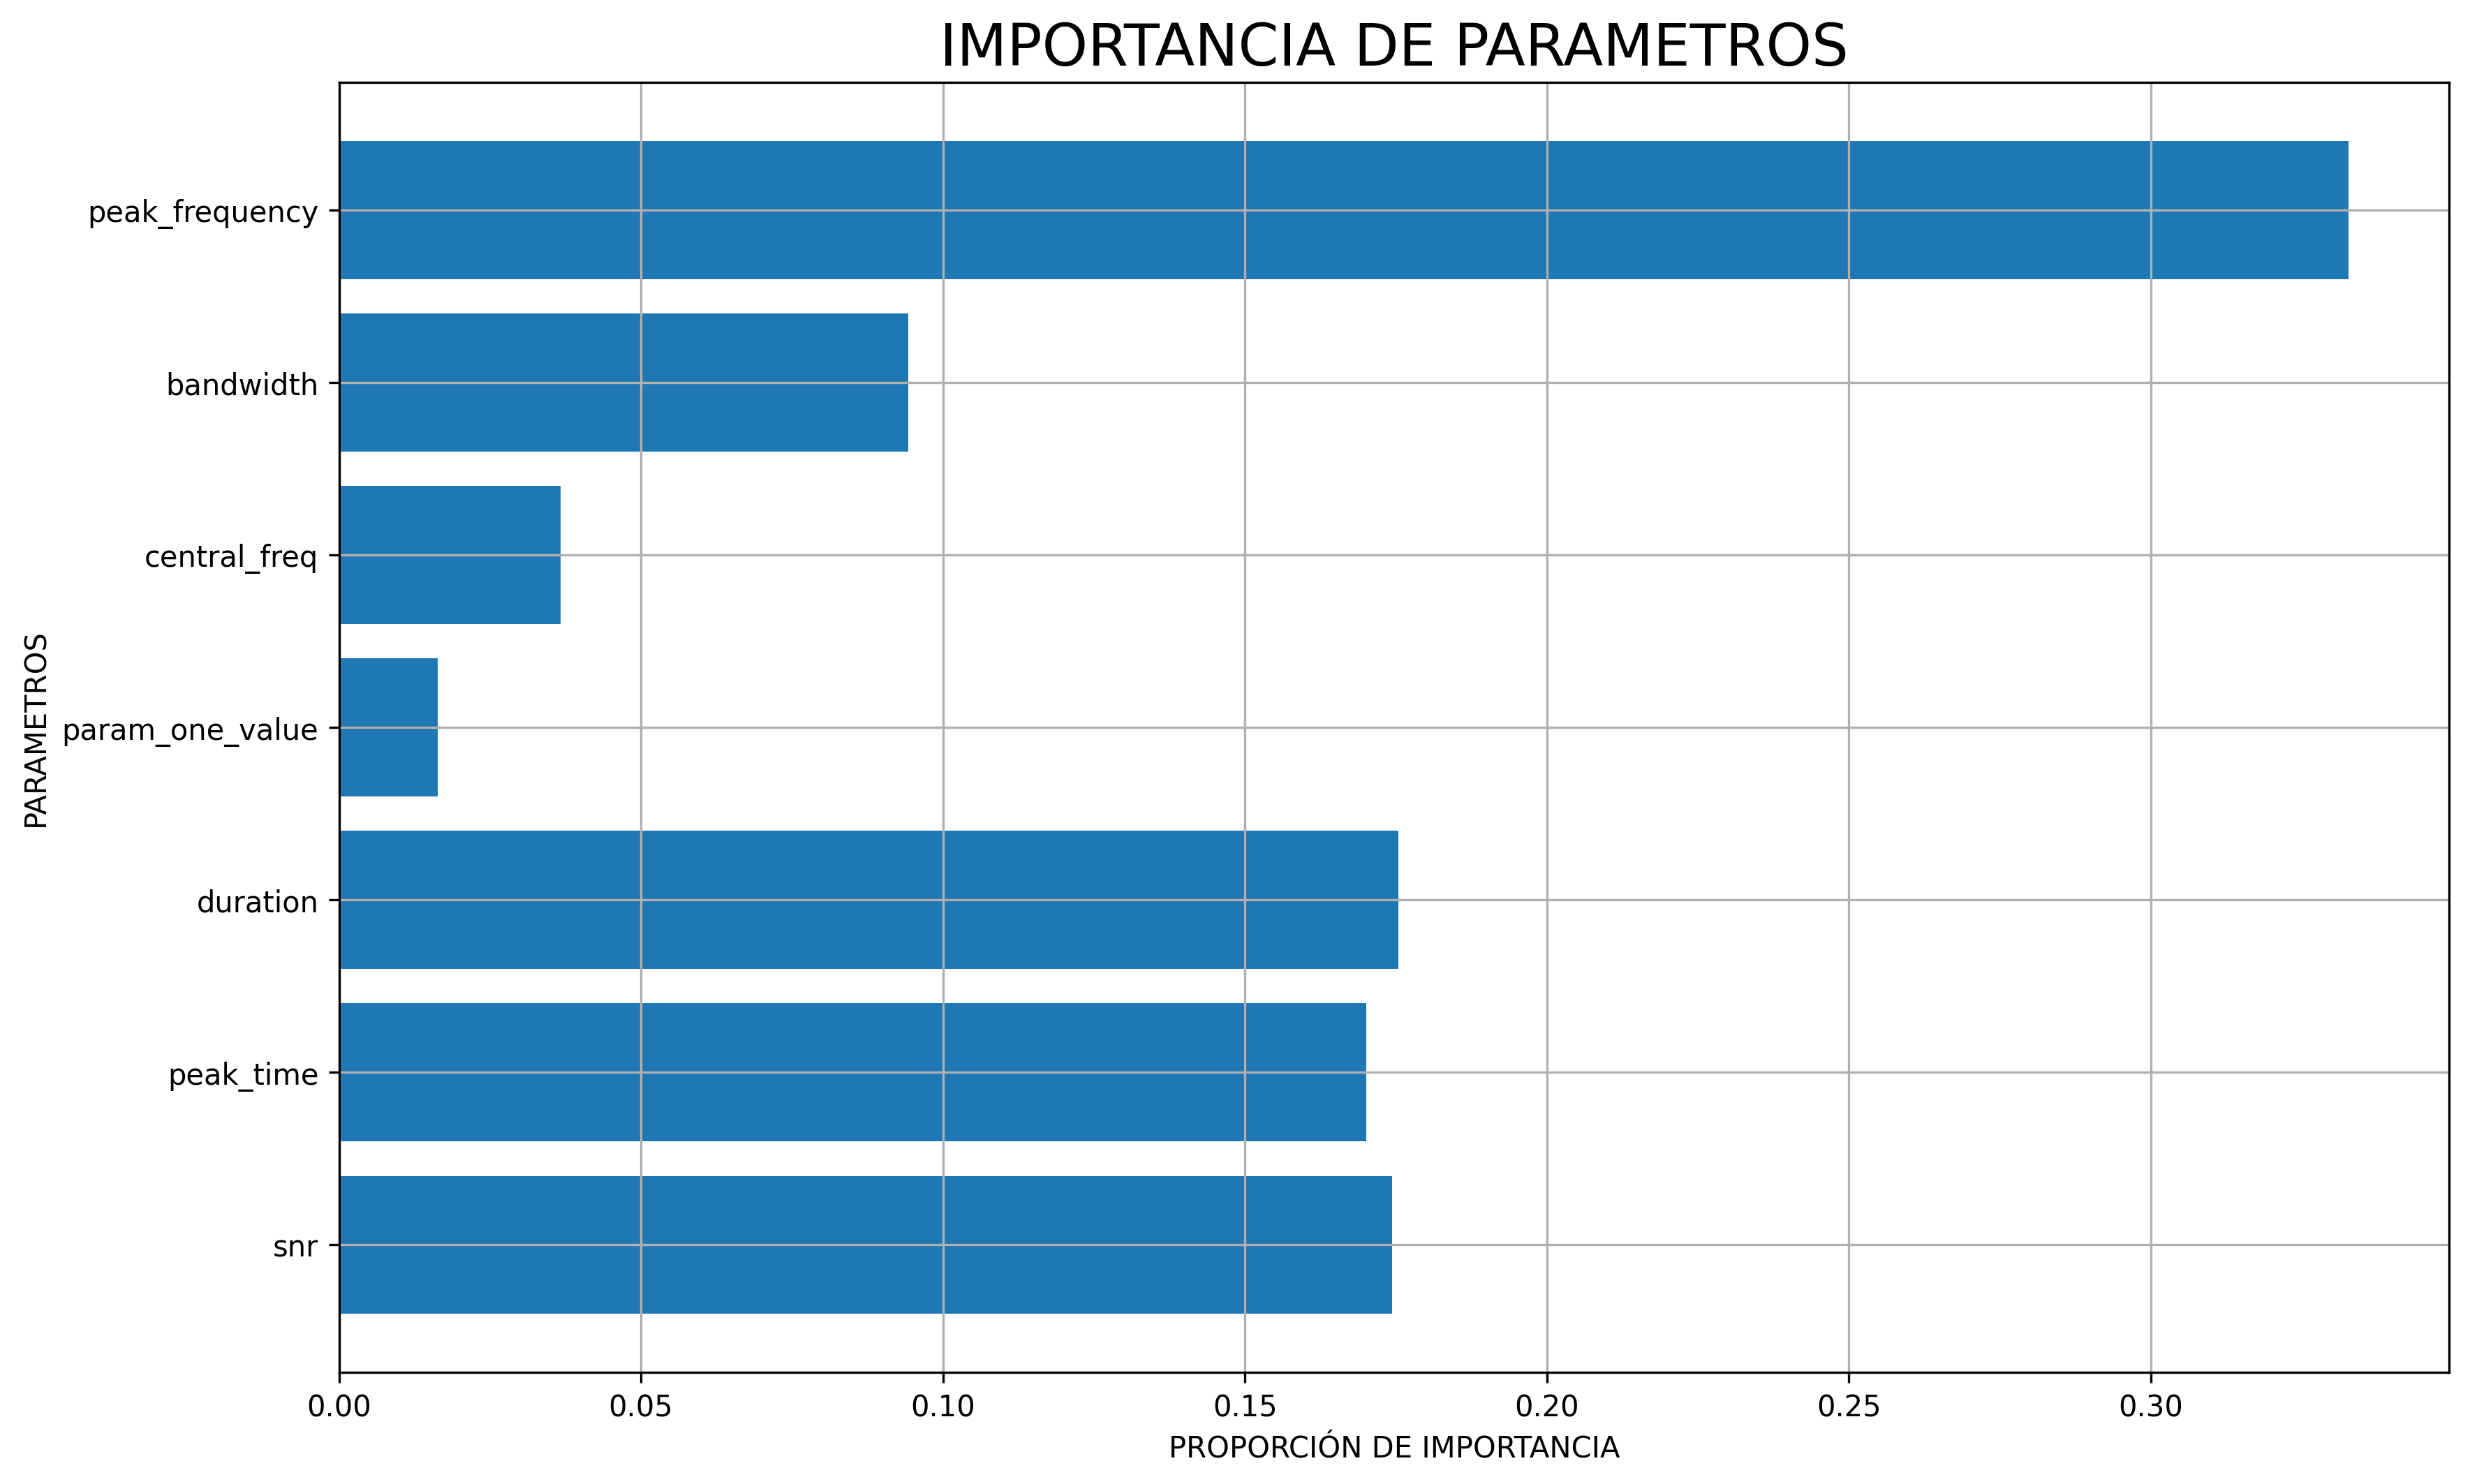

In [21]:
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
plt.figure(figsize=(13, 8))
xxcolum=xx.columns
caractX=xxcolum.shape[0]
plt.barh(range(caractX), Clasificador.feature_importances_)
plt.yticks(np.arange(caractX), xxcolum)
plt.grid()
plt.xlabel('PROPORCIÓN DE IMPORTANCIA')
plt.ylabel('PARAMETROS')
plt.title('IMPORTANCIA DE PARAMETROS', fontsize=20)
plt.show()

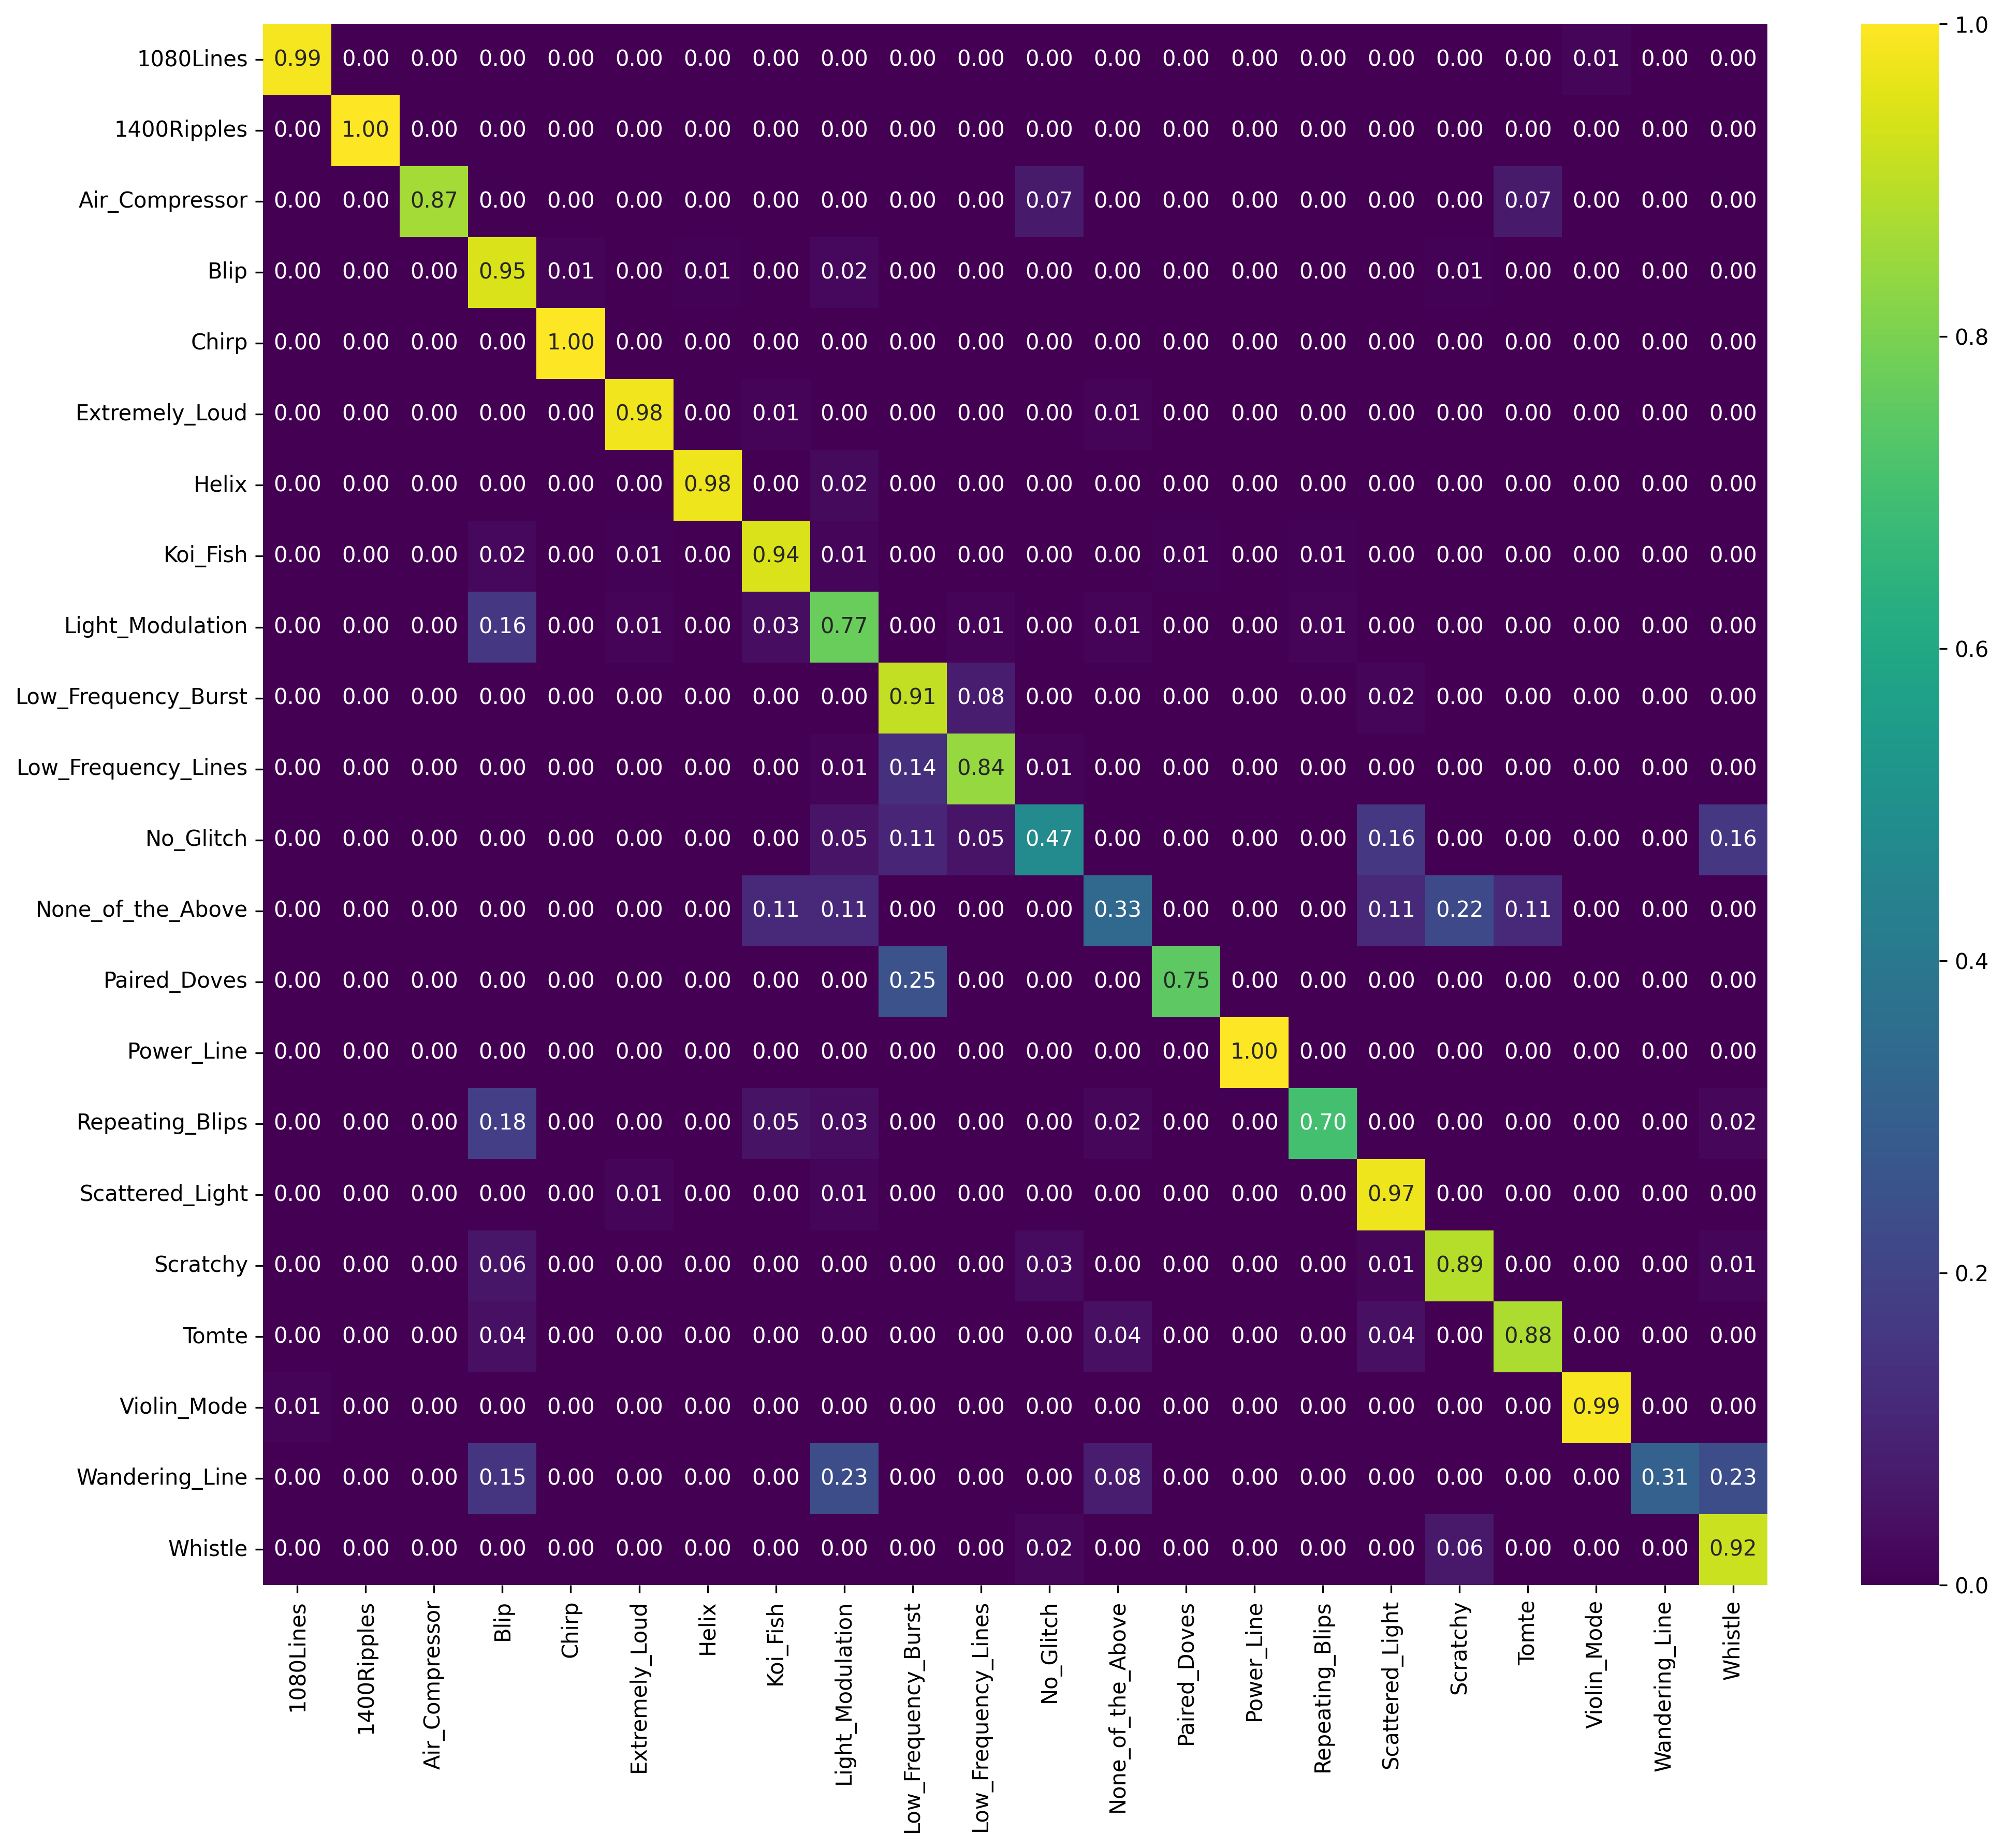

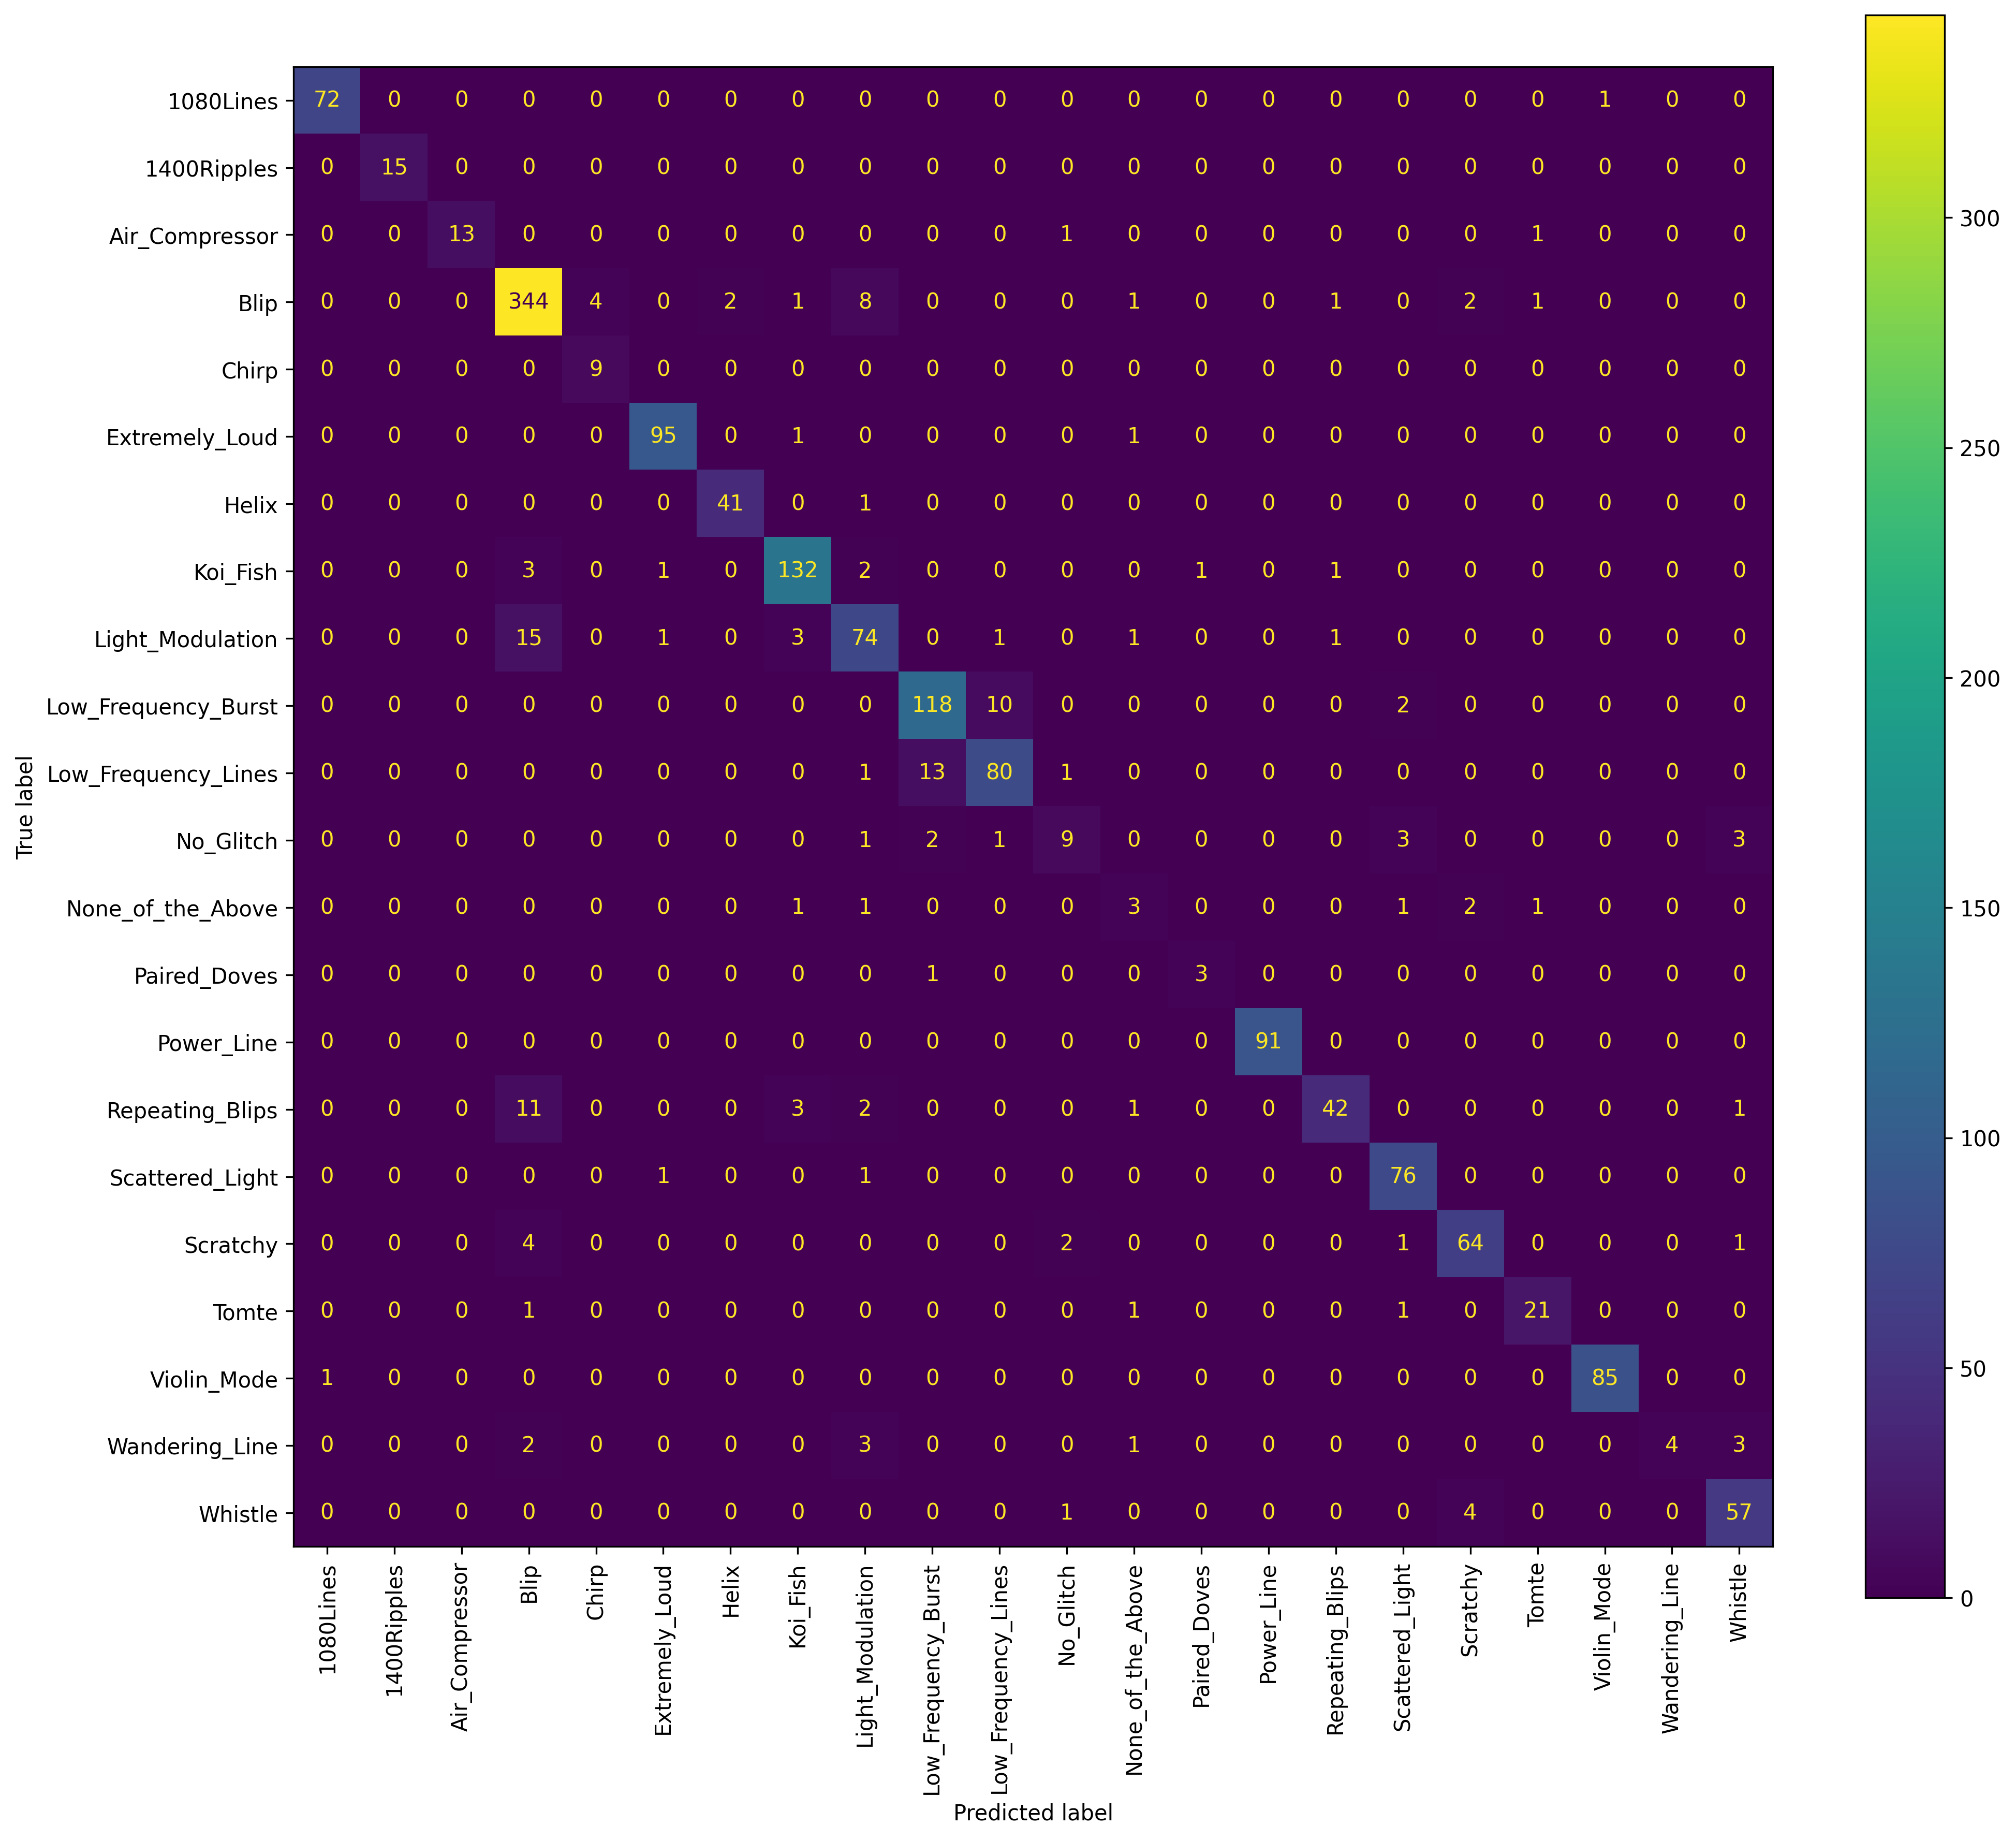

In [22]:
# MATRIZ DE CONFUSIÓN XGBoost


y_encoXB=encoder.fit_transform(df['label'])
cmXG=confusion_matrix(yy_test,y_predec)
cmNXG=cmXG.astype('float')/cmXG.sum(axis=1)[:, np.newaxis]

fig,ax=plt.subplots(figsize=(14,12))
#plt.title('MATRIZ DE CONFUSIÓN XGBoost')
#vis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_name)
#vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
sns.heatmap(cmNXG,annot=True,fmt='.2f',cmap='viridis',xticklabels=class_name,yticklabels=class_name)
plt.tight_layout()
plt.show()
fig,ax=plt.subplots(figsize=(14,12))
vis=ConfusionMatrixDisplay(confusion_matrix=cmXG,display_labels=class_name)
vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
plt.tight_layout()
plt.show()

In [23]:
# REPORTE DE CLASIFICACIÓN
reportXG=classification_report(yy_test,y_predec,target_names=class_name,output_dict=True)
reportdfXG=pd.DataFrame(reportXG).transpose()
reportdf_classesXG=reportdfXG.iloc[:,-3]
Latex_tXG=reportdfXG.sort_values(by='f1-score',ascending=False).to_latex()
print(reportdfXG.sort_values(by='f1-score',ascending=False))

                     precision    recall  f1-score      support
1400Ripples           1.000000  1.000000  1.000000    15.000000
Power_Line            1.000000  1.000000  1.000000    91.000000
Violin_Mode           0.988372  0.988372  0.988372    86.000000
1080Lines             0.986301  0.986301  0.986301    73.000000
Extremely_Loud        0.969388  0.979381  0.974359    97.000000
Helix                 0.953488  0.976190  0.964706    42.000000
Koi_Fish              0.936170  0.942857  0.939502   140.000000
Scattered_Light       0.904762  0.974359  0.938272    78.000000
Air_Compressor        1.000000  0.866667  0.928571    15.000000
Blip                  0.905263  0.945055  0.924731   364.000000
accuracy              0.908407  0.908407  0.908407     0.908407
weighted avg          0.908848  0.908407  0.905928  1594.000000
Whistle               0.876923  0.919355  0.897638    62.000000
Low_Frequency_Burst   0.880597  0.907692  0.893939   130.000000
Scratchy              0.888889  0.888889

In [20]:
reportdfXG.describe()

precision     recall   f1-score      support
count  25.000000  25.000000  25.000000    25.000000
mean    0.874503   0.843288   0.848401   191.316336
std     0.146952   0.196734   0.167581   428.489902
min     0.333333   0.307692   0.333333     0.908407
25%     0.871536   0.837626   0.818182    15.000000
50%     0.905263   0.908407   0.897638    72.000000
75%     0.969388   0.976190   0.939502    96.000000
max     1.000000   1.000000   1.000000  1594.000000

In [17]:
blip_data = df[df['label'] == 'Light_Modulation'] 
display(blip_data.head())

event_time ifo   peak_time  peak_time_ns  start_time  start_time_ns  \
137   1.129625e+09  H1  1129624733     162108898  1129624732      875000000   
1617  1.134779e+09  H1  1134778592     399414062  1134778591      500000000   
1618  1.127309e+09  H1  1127308687     917236089  1127308687      861327886   
1619  1.136407e+09  H1  1136406856     812500000  1136406855      500000000   
1621  1.136514e+09  H1  1136514437     343750000  1136514436      500000000   

      duration   search  process_id  event_id  peak_frequency  central_freq  \
137    0.75000  Omicron           0       113       80.666832    809.473389   
1617   4.00000  Omicron           0        62      137.711487   3653.436768   
1618   0.06445  Omicron           0       119      417.400391    378.457458   
1619   4.00000  Omicron           0       154       10.627180   3458.982422   
1621   3.25000  Omicron           0        59       11.318690   2092.189941   

        bandwidth           channel     amplitude        snr  confidence  \
137   1554.946655  GDS-CALIB_STRAIN  7.820540e-22  19.916470           0   
1617  7296.959473  GDS-CALIB_STRAIN  4.909770e-22  54.319580           0   
1618   638.371704  GDS-CALIB_STRAIN  1.356500e-22   8.538560           0   
1619  6905.679688  GDS-CALIB_STRAIN  3.604420e-19  27.287310           0   
1621  4169.156250  GDS-CALIB_STRAIN  1.387360e-19  21.100389           0   

      chisq  chisq_dof param_one_name  param_one_value gravityspy_id  \
137       0          0          phase         -0.39631    veLtXKvm5S   
1617      0          0          phase          0.03786    zxALwutVBF   
1618      0          0          phase          2.39125    zkqsD91U1Y   
1619      0          0          phase          3.07352    zdtpSQtlCC   
1621      0          0          phase          1.85296    zZgnxP2njl   

                 label sample_type  \
137   Light_Modulation       train   
1617  Light_Modulation       train   
1618  Light_Modulation       train   
1619  Light_Modulation  validation   
1621  Light_Modulation       train   

                                                   url1  \
137   https://panoptes-uploads.zooniverse.org/produc...   
1617  https://panoptes-uploads.zooniverse.org/produc...   
1618  https://panoptes-uploads.zooniverse.org/produc...   
1619  https://panoptes-uploads.zooniverse.org/produc...   
1621  https://panoptes-uploads.zooniverse.org/produc...   

                                                   url2  \
137   https://panoptes-uploads.zooniverse.org/produc...   
1617  https://panoptes-uploads.zooniverse.org/produc...   
1618  https://panoptes-uploads.zooniverse.org/produc...   
1619  https://panoptes-uploads.zooniverse.org/produc...   
1621  https://panoptes-uploads.zooniverse.org/produc...   

                                                   url3  \
137   https://panoptes-uploads.zooniverse.org/produc...   
1617  https://panoptes-uploads.zooniverse.org/produc...   
1618  https://panoptes-uploads.zooniverse.org/produc...   
1619  https://panoptes-uploads.zooniverse.org/produc...   
1621  https://panoptes-uploads.zooniverse.org/produc...   

                                                   url4  
137   https://panoptes-uploads.zooniverse.org/produc...  
1617  https://panoptes-uploads.zooniverse.org/produc...  
1618  https://panoptes-uploads.zooniverse.org/produc...  
1619  https://panoptes-uploads.zooniverse.org/produc...  
1621  https://panoptes-uploads.zooniverse.org/produc...

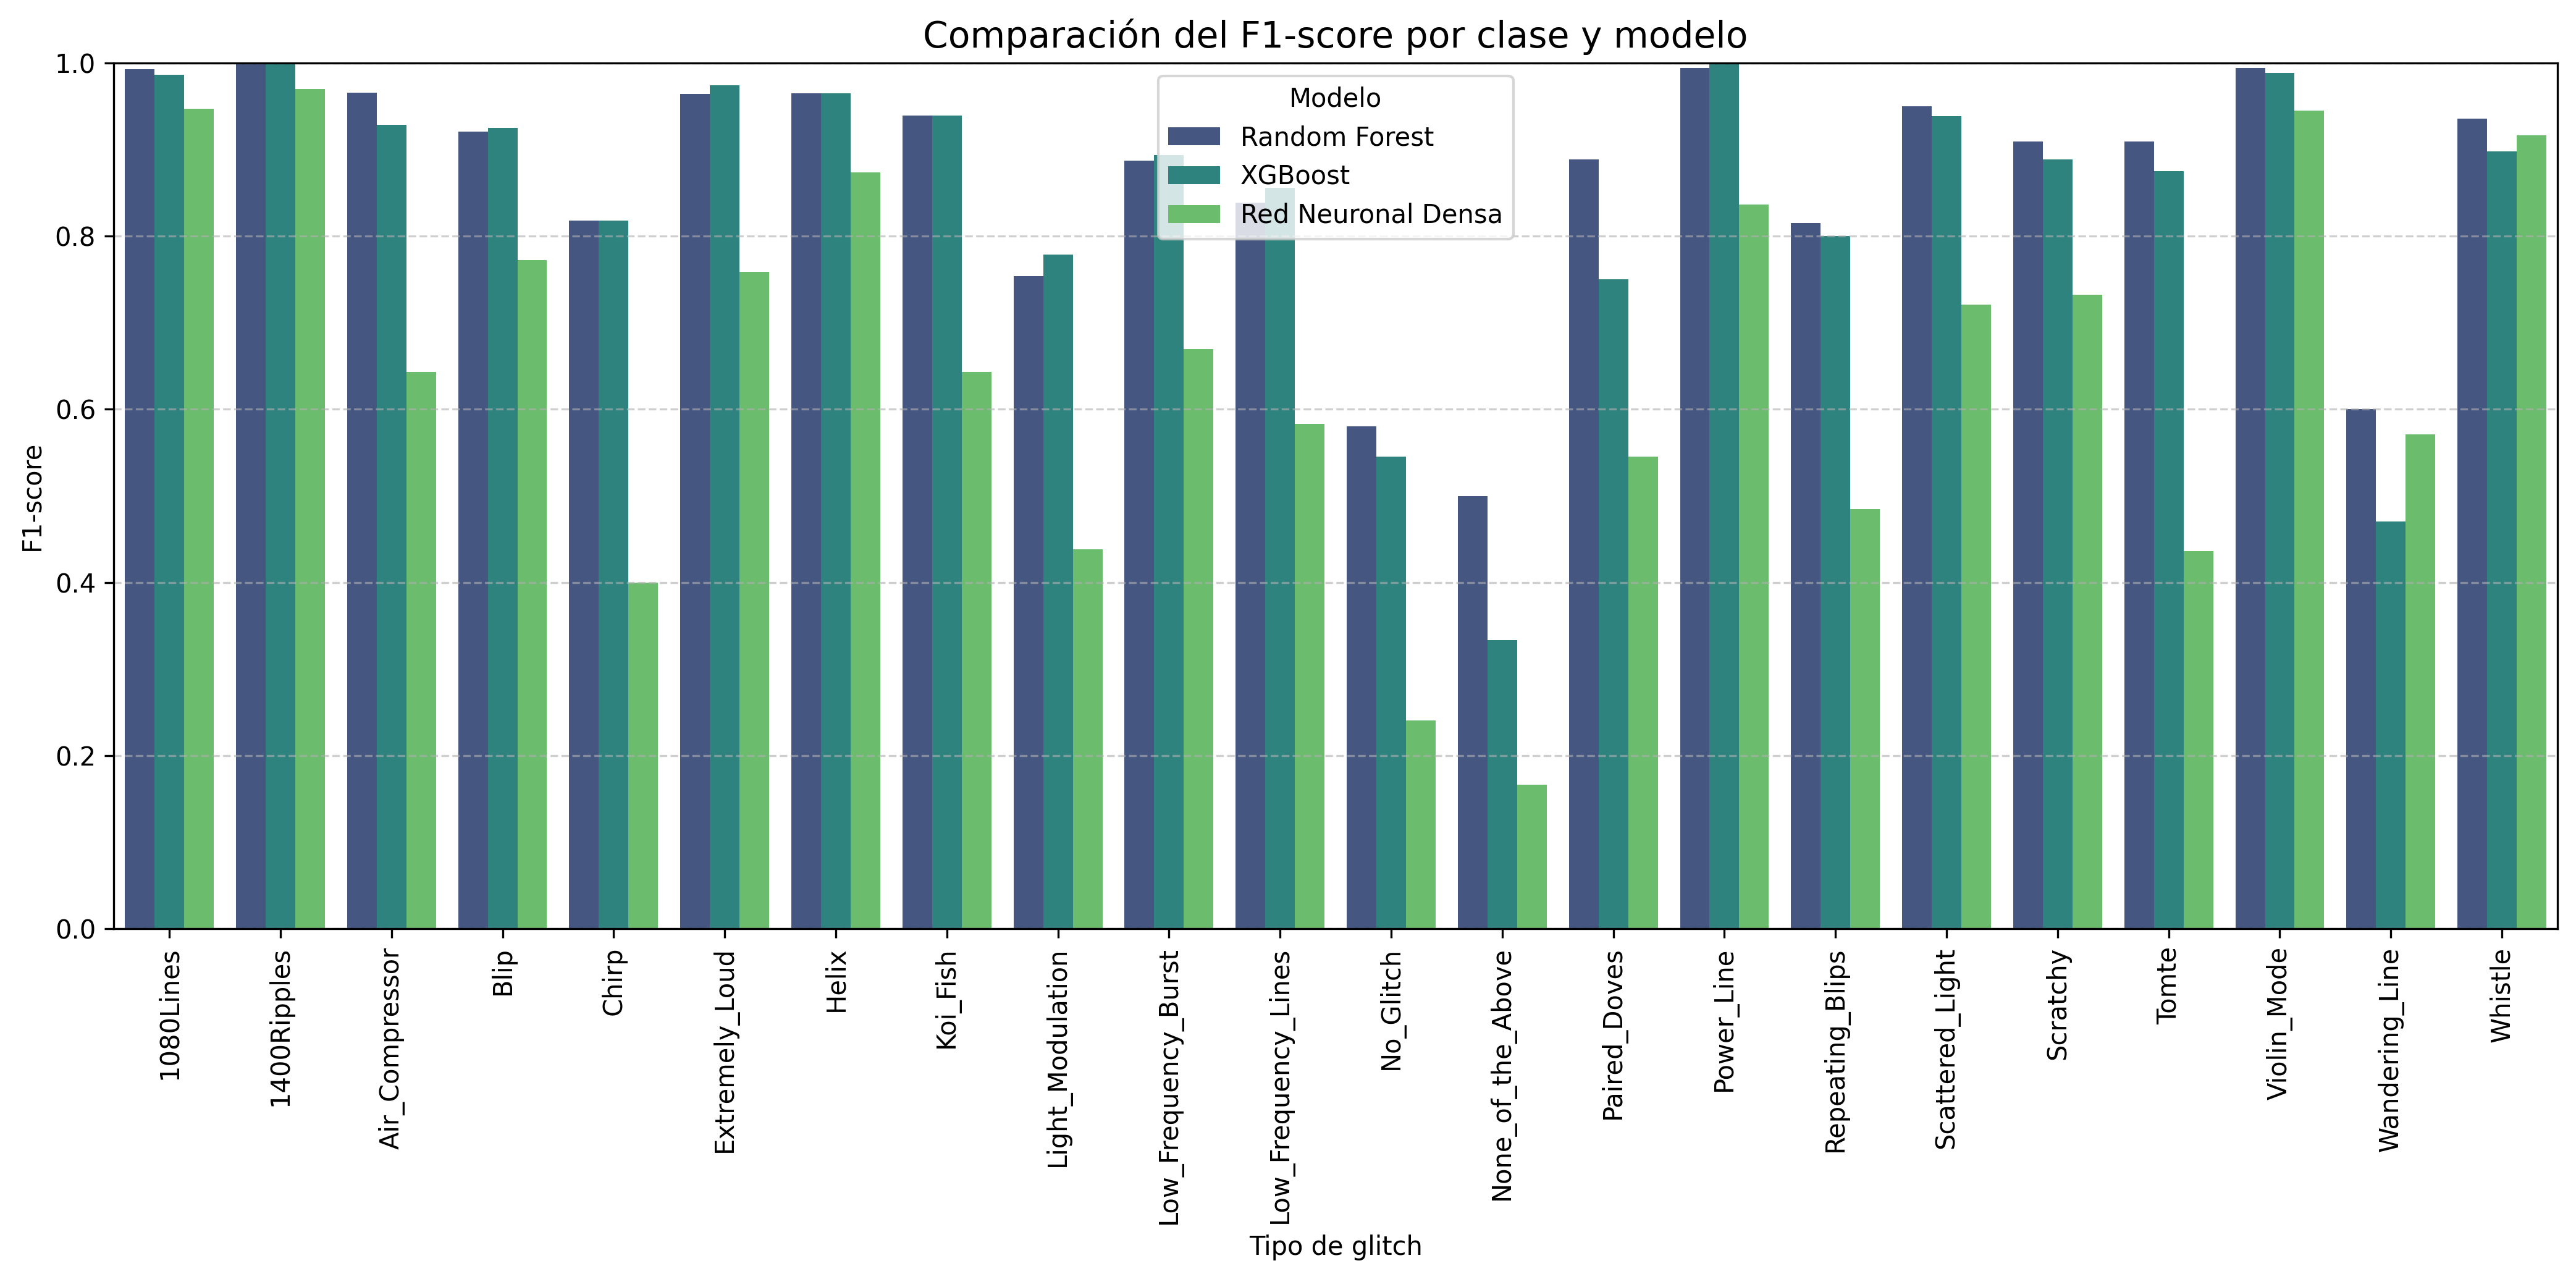

In [29]:
f1_RF = reportdf.loc[class_name, 'f1-score']
f1_XGB = reportdfXG.loc[class_name, 'f1-score']
f1_DNN = reportdfRD.loc[class_name, 'f1-score']
f1_comparison = pd.DataFrame({
    'Random Forest': f1_RF,
    'XGBoost': f1_XGB,
    'Red Neuronal Densa': f1_DNN
}, index=class_name)
f1_long = f1_comparison.reset_index().melt(id_vars='index', var_name='Modelo', value_name='F1-score')
plt.figure(figsize=(14,7))
sns.barplot(data=f1_long, x='index', y='F1-score', hue='Modelo', palette='viridis')
plt.title('Comparación del F1-score por clase y modelo', fontsize=14)
plt.xlabel('Tipo de glitch')
plt.ylabel('F1-score')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()